<h2 style='text-align: center;'> Bank Loan Case Study: Exploratory Data Analysis </p>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#notebook setting to display all the rowns and columns to have better clearity on the data.
pd.set_option('display.max_rows',None,'display.max_columns',None)

In [3]:
#importing data
apd=pd.read_csv("application_data.csv")
pra=pd.read_csv("previous_application.csv")

In [4]:
#checking rows and columns
print ("application_data:",apd.shape)
apd.head()

application_data: (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
#checking info of columns
apd.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
def nullval(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending=False),2)

In [7]:
nullval(apd)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

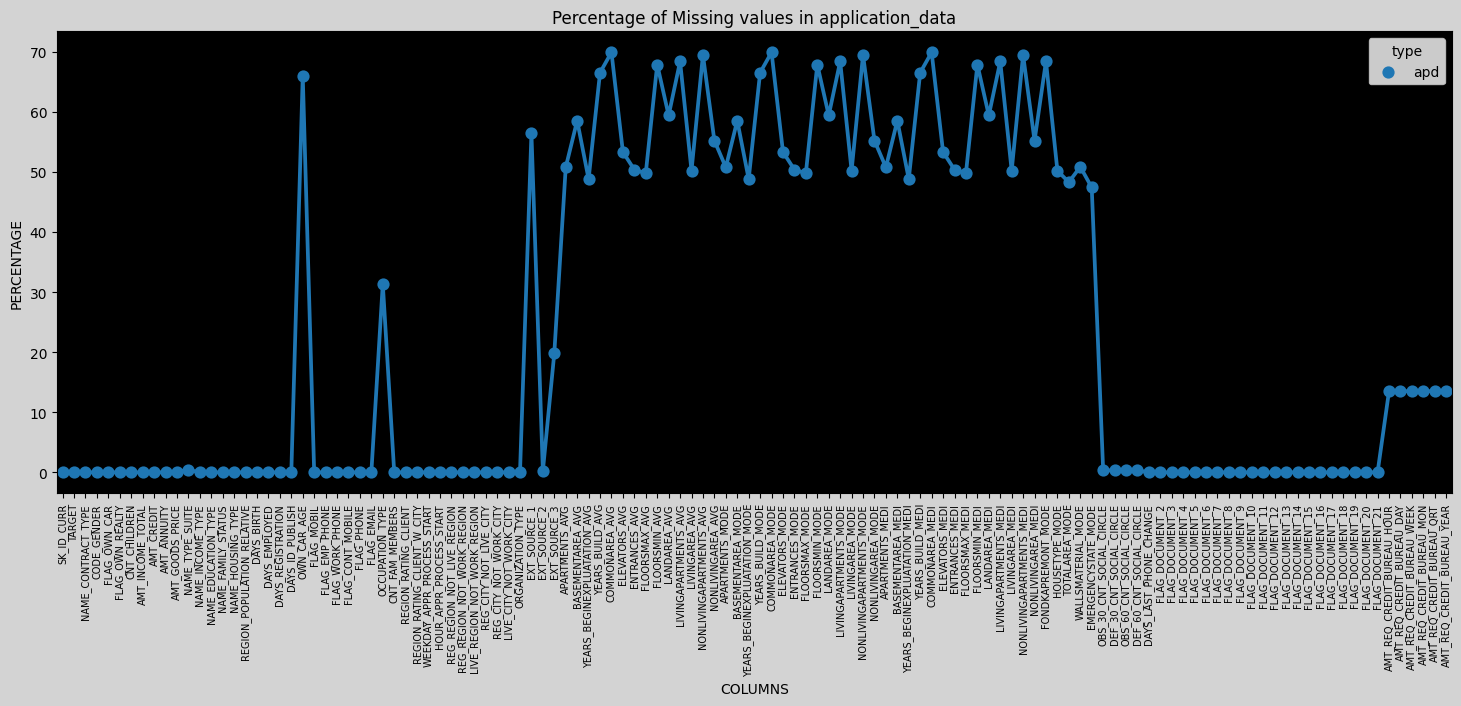

In [8]:
 
    fig = plt.figure(figsize=(18,6))
    miss_data = pd.DataFrame((apd.isnull().sum())*100/apd.shape[0]).reset_index()
    miss_data["type"] = "apd"
    ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
    plt.xticks(rotation =90,fontsize =7)
    plt.title("Percentage of Missing values in application_data")
    plt.ylabel("PERCENTAGE")
    plt.xlabel("COLUMNS")
    ax.set_facecolor("k")
    fig.set_facecolor("lightgrey")

In [9]:
#creating a variable null_col_40 for storing null columns having missing values more than 40%
null_col_40 = nullval(apd)[nullval(apd)>40]
print("following columns have null value more than 40%")
print(null_col_40.index)
print("No. of columns with more than 40% missing value:",len(null_col_40.index))

following columns have null value more than 40%
Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI'

In [10]:
apd.drop(columns = null_col_40.index, inplace = True)
apd.shape

(307511, 73)

In [11]:
nullval(apd)[nullval(apd)>0]

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

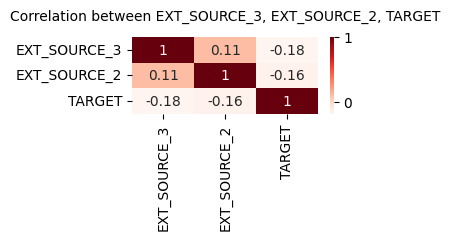

In [12]:
#removing extra columns
#putting irrelevent columns in 1 variable
irrev = ["EXT_SOURCE_3","EXT_SOURCE_2"]
#making a heatmap 
plt.figure(figsize= [3,1])
sns.heatmap(apd[irrev+["TARGET"]].corr(), cmap="Reds",annot=True)
plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":10}, pad=12)
plt.show()

In [13]:
apd.drop(irrev, axis=1, inplace= True)
apd.shape

(307511, 71)

In [14]:
#flag columns
flag=[col for col in apd.columns if "FLAG" in col]
flag

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [15]:
flag_df=apd[flag+["TARGET"]]

In [16]:
#according to column description ->1 implies defaulter, 0 implies repayer
flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

C:\Users\Sethu\AppData\Local\Temp\ipykernel_4124\747839660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})


In [17]:
# as stated in columnn description replacing "1" as Y being TRUE and "0" as N being False

for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})

C:\Users\Sethu\AppData\Local\Temp\ipykernel_4124\1817270070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})


In [18]:
flag_df.head()

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0            N               Y          Y              Y               N   
1            N               N          Y              Y               N   
2            Y               Y          Y              Y               Y   
3            N               Y          Y              Y               N   
4            N               Y          Y              Y               N   

  FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  \
0                Y          Y          N               N               Y   
1                Y          Y          N               N               Y   
2                Y          Y          N               N               N   
3                Y          N          N               N               Y   
4                Y          N          N               N               N   

  FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7  \
0               N               N               N               N   
1               N               N               N               N   
2               N               N               N               N   
3               N               N               N               N   
4               N               N               N               N   

  FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11  \
0               N               N                N                N   
1               N               N                N                N   
2               N               N                N                N   
3               N               N                N                N   
4               Y               N                N                N   

  FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0                N                N                N                N   
1                N                N                N                N   
2                N                N                N                N   
3                N                N                N                N   
4                N                N                N                N   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21     TARGET  
0                N                N  Defaulter  
1                N                N    Repayer  
2                N                N    Repayer  
3                N                N    Repayer  
4                N                N    Repayer

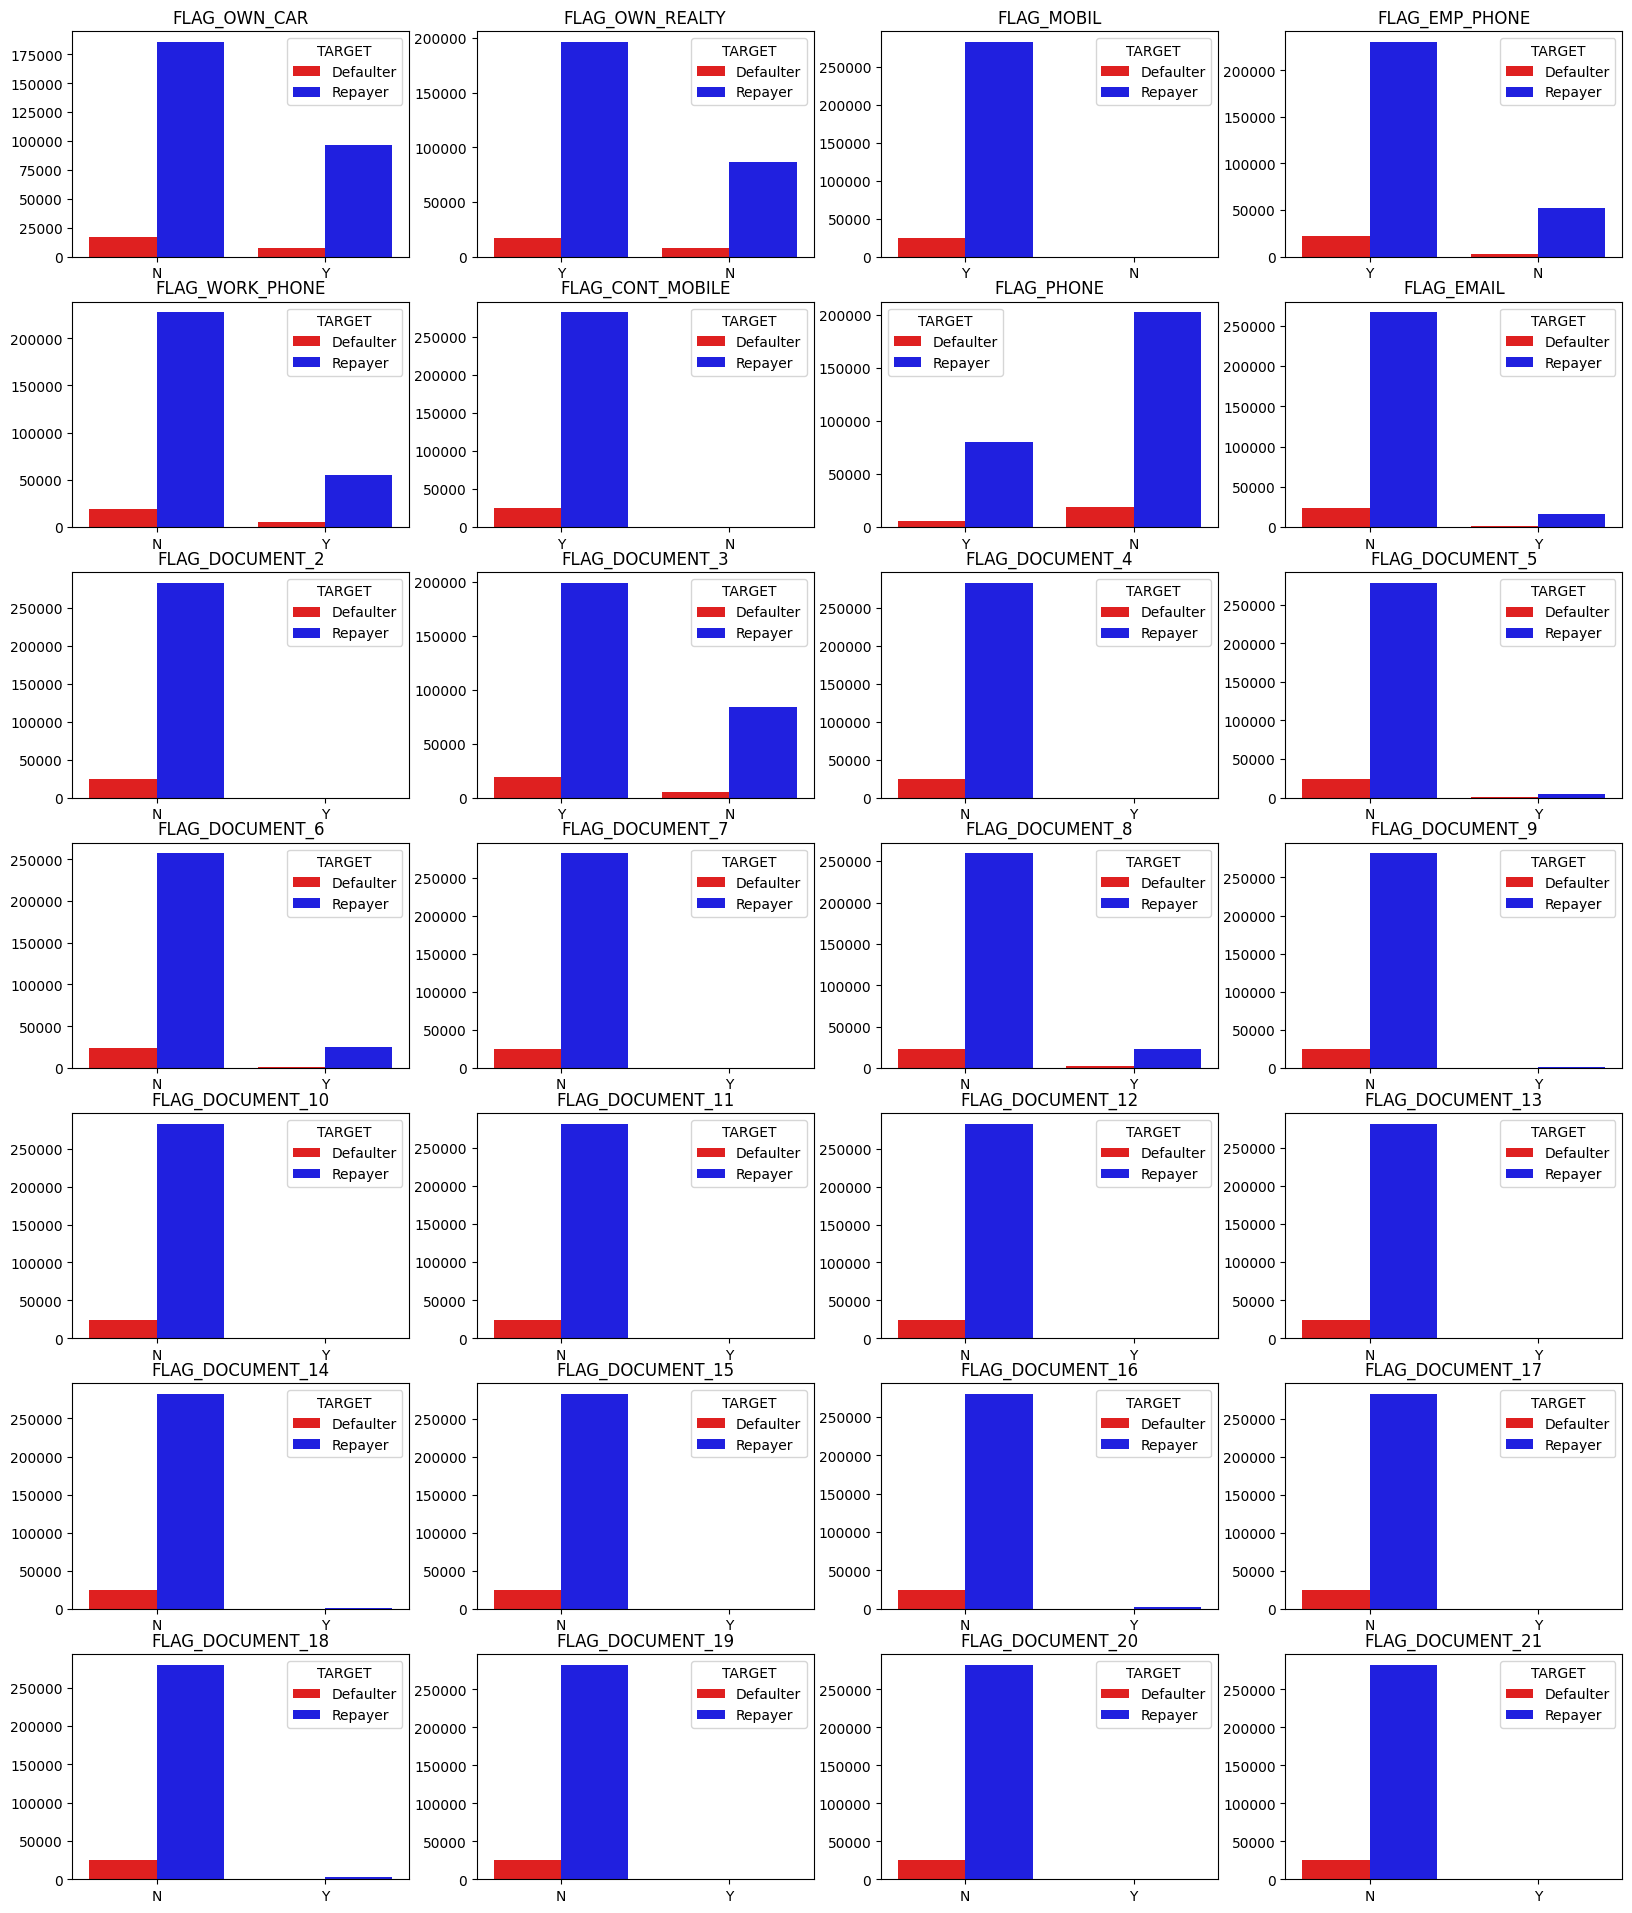

In [19]:
import itertools # using itertools for efficient looping plotting subplots

# Plotting all the graph to find the relation and evaluting for dropping such columns

plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag,range(len(flag))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(x=flag_df[i], hue = flag_df["TARGET"], palette = ["r","b"])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [20]:
# removing required columns from "flag_df" such that we can remove the irrelevent columns from "appl_data" dataset.

flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

C:\Users\Sethu\AppData\Local\Temp\ipykernel_4124\544275879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)


In [21]:
# dropping the columns of "flag_df" dataframe that is removing more 25 columns from "appl_data" dataframe

apd.drop(flag_df.columns, axis=1, inplace= True)

In [22]:
apd.shape 

(307511, 46)

In [23]:
nullval(apd).head(15)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.09
AMT_ANNUITY                    0.00
CNT_FAM_MEMBERS                0.00
dtype: float64

In [24]:
#starting with occupation type
apd["OCCUPATION_TYPE"].value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [25]:
apd["OCCUPATION_TYPE"]=apd["OCCUPATION_TYPE"].fillna("Unknown")
apd["OCCUPATION_TYPE"].isnull().sum() #zero null value left

0

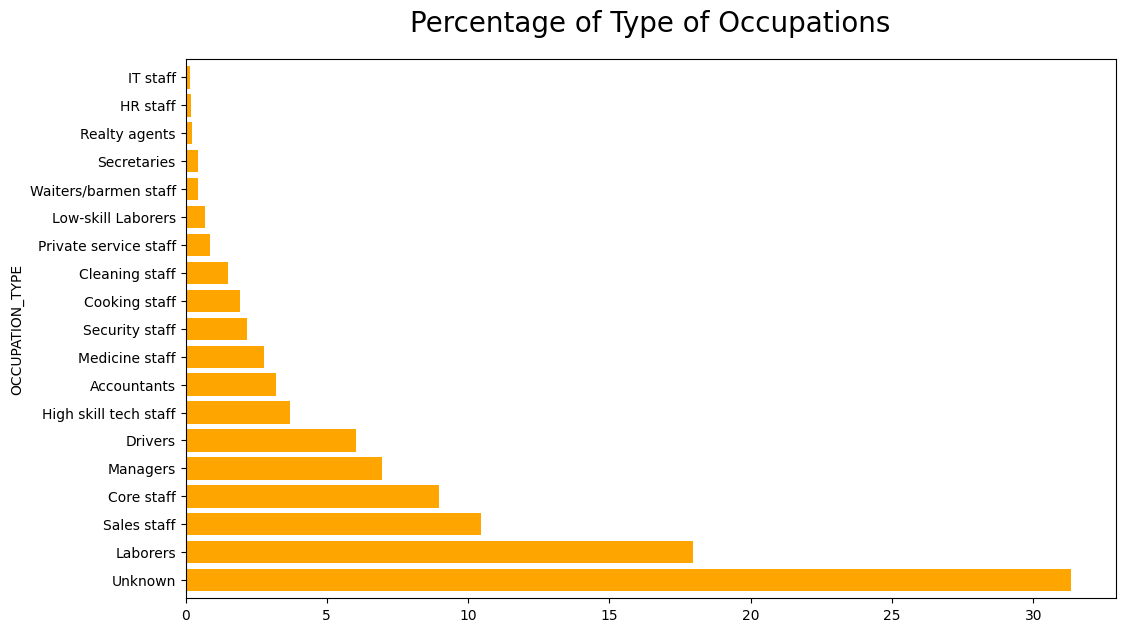

In [26]:
plt.figure(figsize = [12,7])
(apd["OCCUPATION_TYPE"].value_counts(normalize=True)*100).plot.barh(color= "orange",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

In [27]:
amt_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]
apd[amt_credit].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [28]:
apd[amt_credit].median()

AMT_REQ_CREDIT_BUREAU_YEAR    1.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
dtype: float64

In [29]:
apd.fillna(apd[amt_credit].median(),inplace=True)
nullval(apd).head(10)

NAME_TYPE_SUITE             0.42
DEF_60_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
AMT_GOODS_PRICE             0.09
AMT_ANNUITY                 0.00
CNT_FAM_MEMBERS             0.00
DAYS_LAST_PHONE_CHANGE      0.00
ORGANIZATION_TYPE           0.00
dtype: float64

In [30]:
apd["NAME_TYPE_SUITE"].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [31]:
apd["NAME_TYPE_SUITE"]=apd["NAME_TYPE_SUITE"].fillna("Unaccompanied") #BECAUSE UNACCOMPANIED IS THE MODE

In [32]:
apd["NAME_TYPE_SUITE"].isnull().sum()

0

In [33]:
a=["DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE"]

In [34]:
apd[a].describe()

DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   0.100049                  1.405292   
std                    0.362291                  2.379803   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   24.000000                344.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   0.143421                  1.422245  
std                    0.446698                  2.400989  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    0.000000                  2.000000  
max                   34.000000                348.000000

In [35]:
apd[a].median()
apd.fillna(apd[a].median(),inplace=True) #REPLACE WITH MEDIAN
nullval(apd).head()

AMT_GOODS_PRICE           0.09
AMT_ANNUITY               0.00
CNT_FAM_MEMBERS           0.00
DAYS_LAST_PHONE_CHANGE    0.00
SK_ID_CURR                0.00
dtype: float64

In [36]:
apd["AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [37]:
apd["AMT_GOODS_PRICE"].isnull().sum() #REPLACED WITH MEDIAN

278

In [38]:
apd.fillna(apd["AMT_GOODS_PRICE"].median(),inplace=True)

In [39]:
nullval(apd)

SK_ID_CURR                     0.0
OBS_30_CNT_SOCIAL_CIRCLE       0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
TARGET                         0.0
OBS_60_CNT_SOCIAL_CIRCLE       0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
DAYS_LAST_PHONE_CHANGE         0.0
FLAG_DOCUMENT_3                0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
REGION_RATING_CLIENT_W_CITY    0.0
REGION_RATING_CLIENT           0.0
CNT_FAM_MEMBERS                0.0
OCCUPATION_TYPE                0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_REALTY     

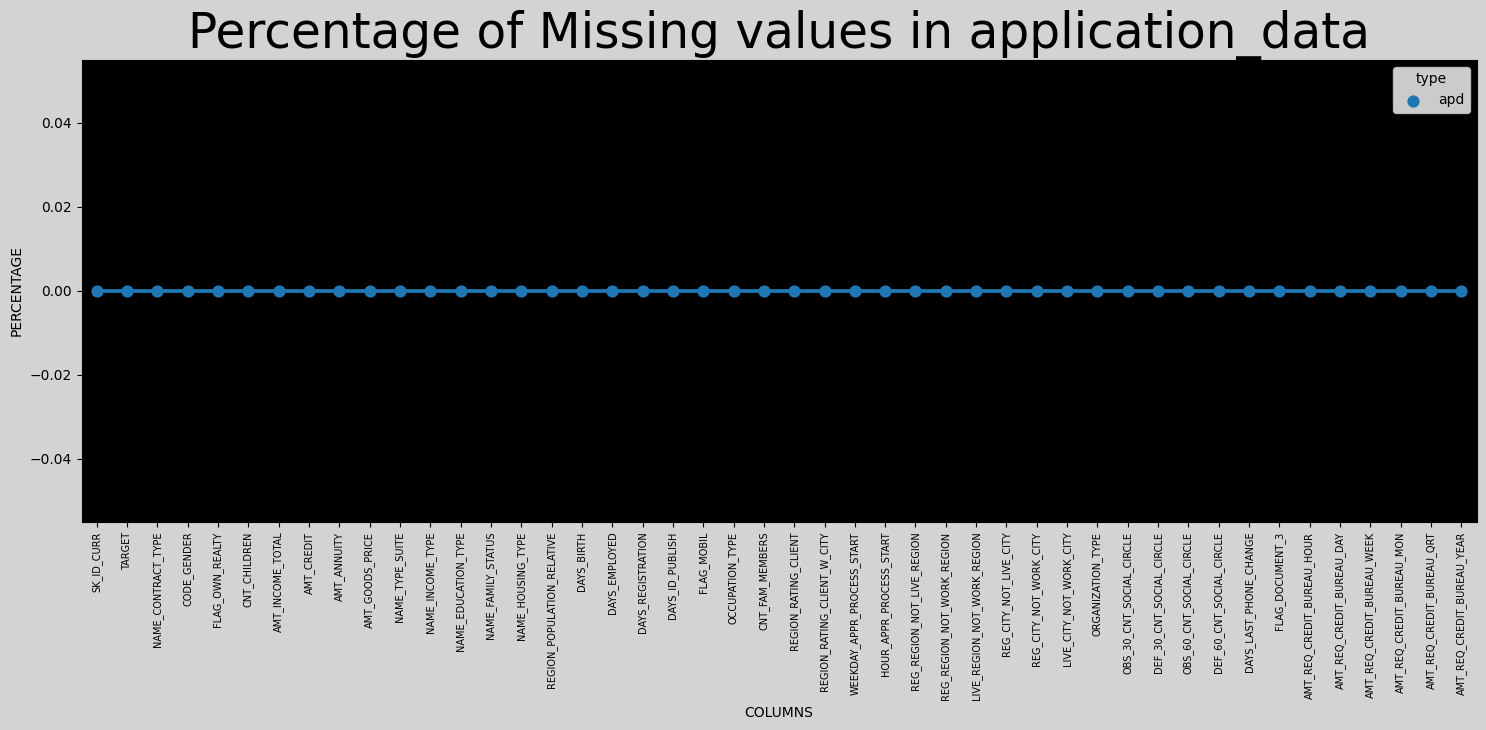

In [40]:
    fig = plt.figure(figsize=(18,6))
    miss_data = pd.DataFrame((apd.isnull().sum())*100/apd.shape[0]).reset_index()
    miss_data["type"] = "apd"
    ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
    plt.xticks(rotation =90,fontsize =7)
    plt.title("Percentage of Missing values in application_data",fontsize=35)
    plt.ylabel("PERCENTAGE")
    plt.xlabel("COLUMNS")
    ax.set_facecolor("k")
    fig.set_facecolor("lightgrey")

In [41]:
#STANDARDIZING VALUES
# Binning Numerical Columns to create a categorical column
# Creating bins for income amount in term of Lakhs
apd['AMT_INCOME_TOTAL']=apd['AMT_INCOME_TOTAL']/100000

In [42]:
bins = [0,1,2,3,4,5,6,7,8,9,10,1170]#1170 is the largest value
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

apd['AMT_INCOME_RANGE']=pd.cut(apd['AMT_INCOME_TOTAL'],bins,labels=slot)

In [43]:
apd["AMT_INCOME_RANGE"].value_counts(normalize=True)*100

AMT_INCOME_RANGE
1L-2L        50.696723
2L-3L        21.194689
0-1L         20.714056
3L-4L         4.772512
4L-5L         1.743352
5L-6L         0.356085
6L-7L         0.282592
8L-9L         0.096907
10L Above     0.081298
7L-8L         0.052681
9L-10L        0.009105
Name: proportion, dtype: float64

In [44]:
# Creating bins for Credit amount in term of Lakhs
apd['AMT_CREDIT']=apd['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,41] #40.5 is the highest amount
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

apd['AMT_CREDIT_RANGE']=pd.cut(apd['AMT_CREDIT'],bins=bins,labels=slots)

In [45]:
apd['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
2L-3L        17.824728
10L Above    16.254703
5L-6L        11.131960
4L-5L        10.418489
1L-2L         9.801275
3L-4L         8.564897
6L-7L         7.820533
8L-9L         7.086576
7L-8L         6.241403
9L-10L        2.902986
0-1L          1.952450
Name: proportion, dtype: float64

In [46]:
# Creating bins for Price of Goods in term of Lakhs
apd['AMT_GOODS_PRICE']=apd['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,41] #40.5 is the highest value
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

apd['AMT_GOODS_PRICE_RANGE']=pd.cut(apd['AMT_GOODS_PRICE'],bins=bins,labels=slots)
apd['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)*100

AMT_GOODS_PRICE_RANGE
2L-3L        20.409351
4L-5L        18.617545
6L-7L        13.015469
10L Above    11.095213
1L-2L        10.717015
8L-9L         6.986417
3L-4L         6.900241
5L-6L         4.265538
0-1L          2.832094
7L-8L         2.637304
9L-10L        2.523812
Name: proportion, dtype: float64

In [47]:
# creating "days_col" varibale to store all days columns
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

apd[days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120328     -2994.202373   
std      4363.988632  141275.766519        3522.886321      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean              -961.392295  
std               1159.717257  
min              -4292.000000  
25%              -1570.000000  
50%               -757.000000  
75%               -274.000000  
max             450000.000000

In [48]:
apd[days_col]=abs(apd[days_col])
apd[days_col].describe()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean    16036.995067   67724.742149        4986.120328      2994.202373   
std      4363.988632  139443.751806        3522.886321      1509.450419   
min      7489.000000       0.000000           0.000000         0.000000   
25%     12413.000000     933.000000        2010.000000      1720.000000   
50%     15750.000000    2219.000000        4504.000000      3254.000000   
75%     19682.000000    5707.000000        7479.500000      4299.000000   
max     25229.000000  365243.000000       24672.000000      7197.000000   

       DAYS_LAST_PHONE_CHANGE  
count           307511.000000  
mean               964.319019  
std               1157.284784  
min                  0.000000  
25%                274.000000  
50%                757.000000  
75%               1570.000000  
max             450000.000000

In [49]:
#days brith to age
apd["AGE"] = abs(apd["DAYS_BIRTH"]/365)
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

apd["AGE_GROUP"] = pd.cut(apd["AGE"], bins=bins, labels=slots)
apd["AGE_GROUP"].value_counts(normalize=True)*100

AGE_GROUP
35-40       13.940314
40-45       13.464884
30-35       12.825557
60 Above    11.569993
45-50       11.425608
50-55       11.362846
55-60       10.770346
25-30       10.686447
20-25        3.954005
0-20         0.000000
Name: proportion, dtype: float64

In [50]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

apd["YEARS_EMPLOYED"] = apd["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,1001] #1000.5 was largest value
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

apd["EMPLOYEMENT_YEARS"] = pd.cut(apd["YEARS_EMPLOYED"], bins=bins, labels=slots)
apd["EMPLOYEMENT_YEARS"].value_counts(normalize=True)*100

EMPLOYEMENT_YEARS
0-5         44.326833
5-10        21.095968
30 Above    18.984485
10-15        8.958762
15-20        3.528027
20-25        2.030184
25-30        1.075741
Name: proportion, dtype: float64

In [51]:
#OUTLIERS
apd.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000     307511.000000   
mean   278180.518577       0.080729       0.417052          1.687979   
std    102790.175348       0.272419       0.722121          2.371231   
min    100002.000000       0.000000       0.000000          0.256500   
25%    189145.500000       0.000000       0.000000          1.125000   
50%    278202.000000       0.000000       0.000000          1.471500   
75%    367142.500000       0.000000       1.000000          2.025000   
max    456255.000000       1.000000      19.000000       1170.000000   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  307511.000000  307511.000000    307511.000000   
mean        5.990260   27125.076399         5.383163   
std         4.024908   14732.234576         3.692890   
min         0.450000    1615.500000         0.405000   
25%         2.700000   16524.000000         2.385000   
50%         5.135310   24903.000000         4.500000   
75%         8.086500   34596.000000         6.795000   
max        40.500000  450000.000000        40.500000   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868   16036.995067   67724.742149   
std                      0.013831    4363.988632  139443.751806   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12413.000000     933.000000   
50%                      0.018850   15750.000000    2219.000000   
75%                      0.028663   19682.000000    5707.000000   
max                      0.072508   25229.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  CNT_FAM_MEMBERS  \
count      307511.000000    307511.000000  307511.000000    307511.000000   
mean         4986.120328      2994.202373       0.999997         5.079376   
std          3522.886321      1509.450419       0.001803      1147.610563   
min             0.000000         0.000000       0.000000         1.000000   
25%          2010.000000      1720.000000       1.000000         2.000000   
50%          4504.000000      3254.000000       1.000000         2.000000   
75%          7479.500000      4299.000000       1.000000         3.000000   
max         24672.000000      7197.000000       1.000000    450000.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         307511.000000                307511.000000   
mean               2.052463                     2.031521   
std                0.509034                     0.502737   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            307511.000000               307511.000000   
mean                 12.063419                    0.015144   
std                   3.265832                    0.122126   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  14.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000

In [52]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "CNT_FAM_MEMBERS"]

C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn

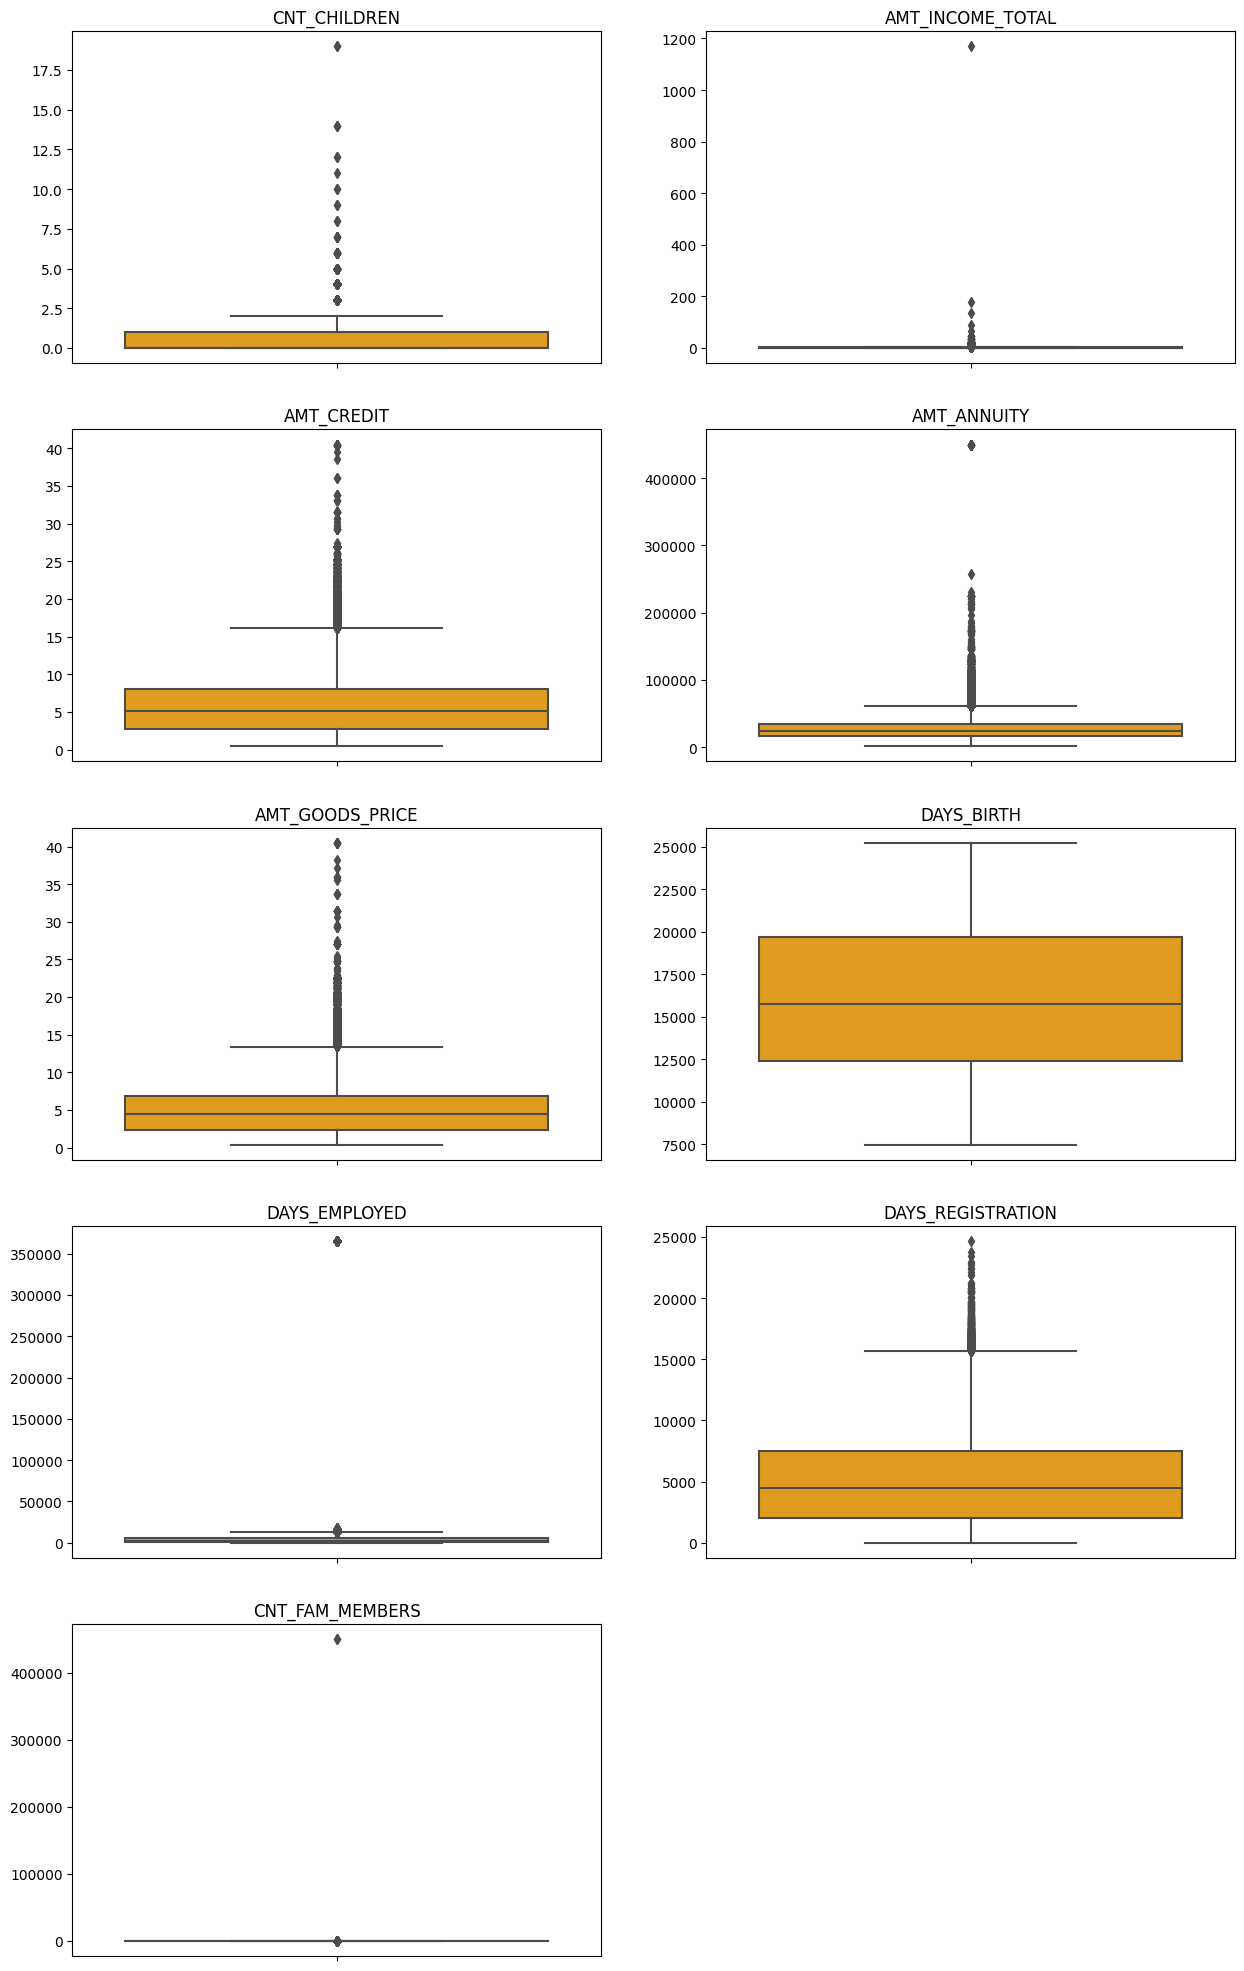

In [55]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(5,2,j+1)
    sns.boxplot(y = apd[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [56]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_columns:
    apd[col] = pd.Categorical(apd[col])

In [57]:
#data set 2- previous application
print("Previous Application:", pra.shape)

Previous Application: (1670214, 37)


In [58]:
nullval(pra)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

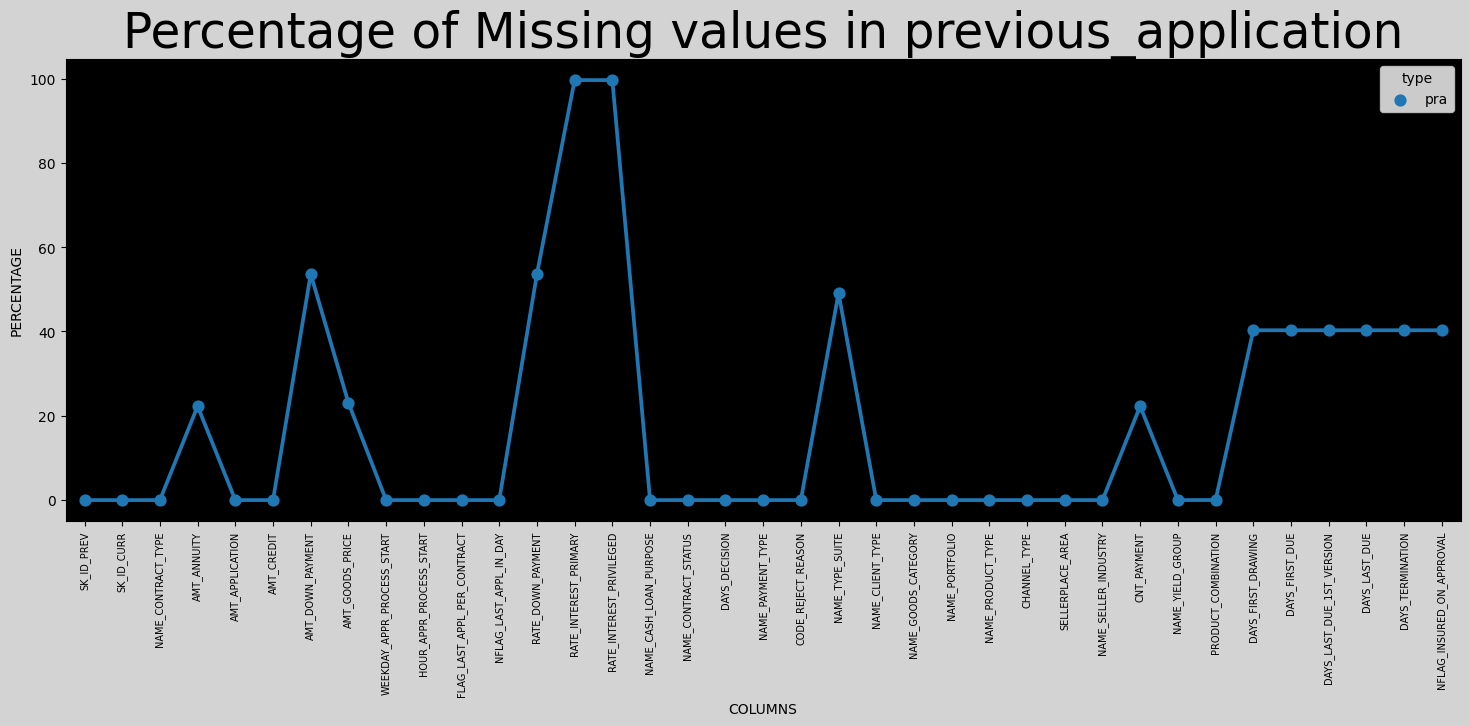

In [59]:
    fig = plt.figure(figsize=(18,6))
    miss_data = pd.DataFrame((pra.isnull().sum())*100/pra.shape[0]).reset_index()
    miss_data["type"] = "pra"
    ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
    plt.xticks(rotation =90,fontsize =7)
    plt.title("Percentage of Missing values in previous_application",fontsize=35)
    plt.ylabel("PERCENTAGE")
    plt.xlabel("COLUMNS")
    ax.set_facecolor("k")
    fig.set_facecolor("lightgrey")

In [60]:
pnullcol50=nullval(pra)[nullval(pra)>50]

In [61]:
pnullcol50

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

In [62]:
pra.drop(columns=pnullcol50.index,inplace=True)

In [63]:
pra.shape

(1670214, 33)

In [64]:
pnullcol15=nullval(pra)[nullval(pra)>15] #null values greater than 15%

In [65]:
pnullcol15 #columns with null value greater than 15%

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

In [66]:
# Listing down columns which are not needed

Unnecessary_col = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
                  'NFLAG_LAST_APPL_IN_DAY']
#pra.drop(Unnecessary_col,axis =1, inplace = True)

pra.shape

(1670214, 33)

In [67]:
# IMputing values "Unknown" as this a categorical column
pra["NAME_TYPE_SUITE"] = pra["NAME_TYPE_SUITE"].fillna("Unknown")

pra["NAME_TYPE_SUITE"].value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unknown            49.119754
Unaccompanied      30.473341
Family             12.768603
Spouse, partner     4.015593
Children            1.889937
Other_B             1.055194
Other_A             0.543463
Group of people     0.134115
Name: proportion, dtype: float64

In [68]:
nullval(pra)

NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_LAST_DUE                  40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
SK_ID_CURR                      0.00
CODE_REJECT_REASON              0.00
NAME_PAYMENT_TYPE               0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
F

In [69]:
pra['NFLAG_INSURED_ON_APPROVAL'].value_counts()

NFLAG_INSURED_ON_APPROVAL
0.0    665527
1.0    331622
Name: count, dtype: int64

In [70]:
pra['NFLAG_INSURED_ON_APPROVAL']=pra['NFLAG_INSURED_ON_APPROVAL'].fillna(0)

In [71]:
nullval(pra)

DAYS_FIRST_DRAWING             40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
SELLERPLACE_AREA                0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SK_ID_PREV                      0.00
NAME_SELLER_INDUSTRY            0.00
NAME_YIELD_GROUP                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_TYPE_SUITE                 0.00
NAME_CLIENT_TYPE                0.00
SK_ID_CURR                      0.00
CODE_REJECT_REASON              0.00
NAME_PAYMENT_TYPE               0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
F

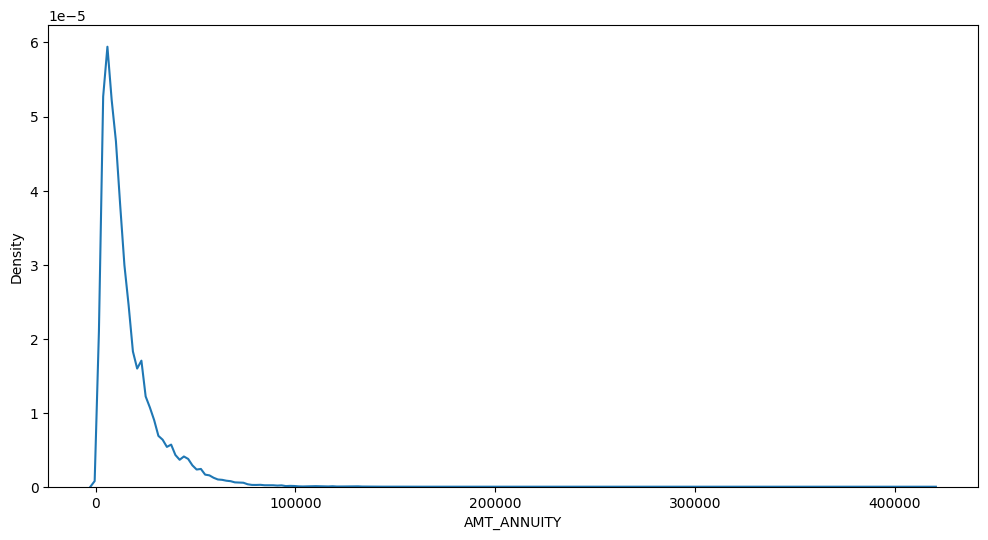

In [72]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(12,6))
sns.kdeplot(pra['AMT_ANNUITY'])
plt.show()

In [73]:
#imputing missing values with median as there is only 1 peak implying outliers 

pra['AMT_ANNUITY'].fillna(pra['AMT_ANNUITY'].median(),inplace = True)

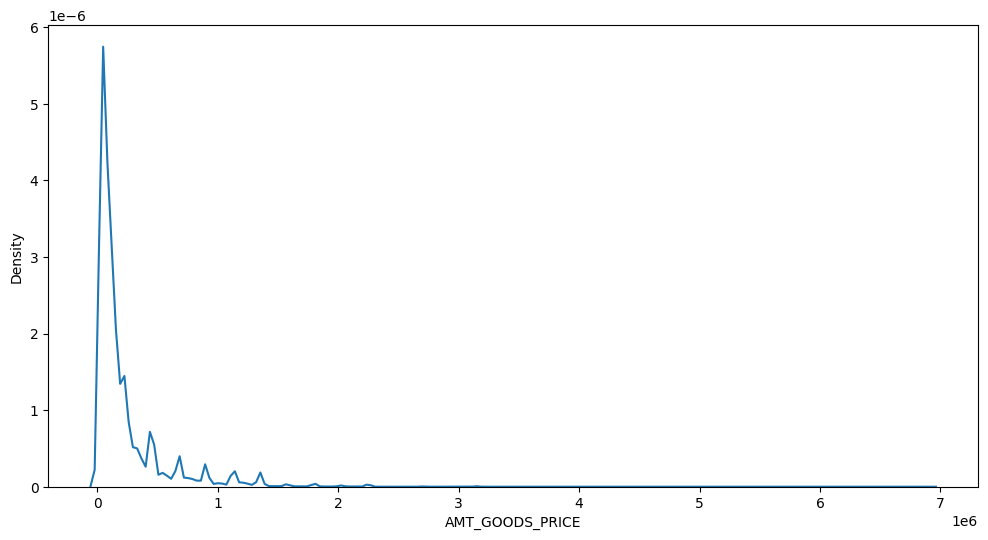

In [74]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(pra['AMT_GOODS_PRICE'])
plt.show()

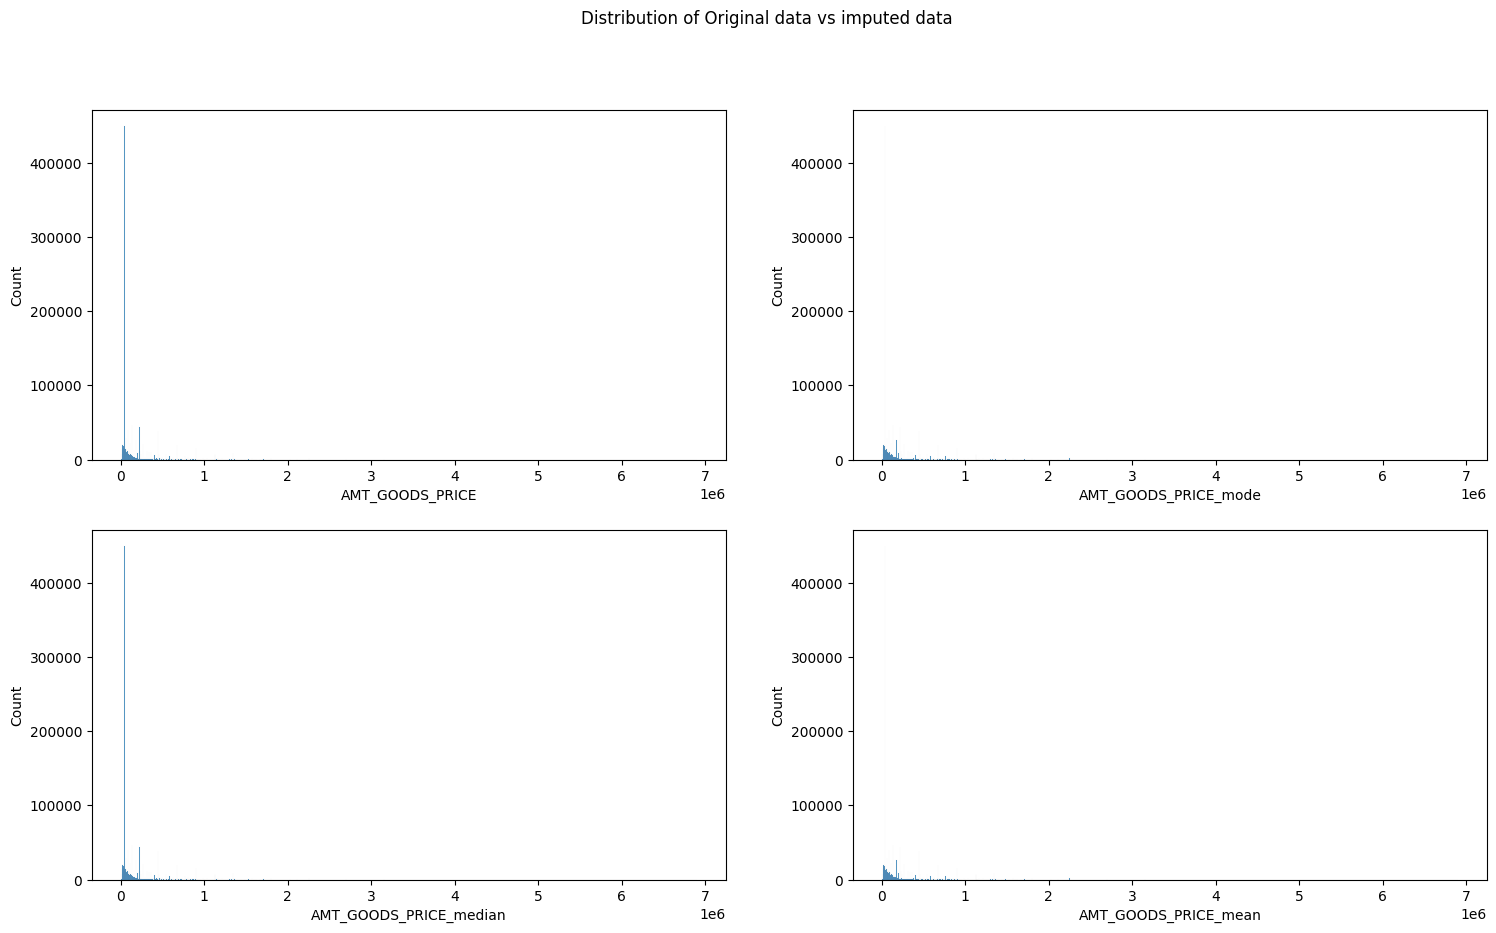

In [78]:
# Creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean

statsDF = pd.DataFrame()
statsDF['AMT_GOODS_PRICE_mode'] = pra['AMT_GOODS_PRICE'].fillna(pra['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = pra['AMT_GOODS_PRICE'].fillna(pra['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = pra['AMT_GOODS_PRICE'].fillna(pra['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median', 'AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18, 10))
plt.suptitle('Distribution of Original data vs imputed data')

plt.subplot(221)
sns.histplot(pra['AMT_GOODS_PRICE'][pd.notnull(pra['AMT_GOODS_PRICE'])])

for i in cols:
    plt.subplot(2, 2, cols.index(i) + 2)
    sns.histplot(statsDF[i])

plt.show()

In [79]:
# Imputing null values with mode

pra['AMT_GOODS_PRICE'].fillna(pra['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [80]:
nullval(pra)

DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
SELLERPLACE_AREA                0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SK_ID_PREV                      0.00
NAME_SELLER_INDUSTRY            0.00
NAME_YIELD_GROUP                0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_TYPE_SUITE                 0.00
SK_ID_CURR                      0.00
CODE_REJECT_REASON              0.00
NAME_PAYMENT_TYPE               0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
W

In [81]:
pra['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [82]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.
pra.loc[pra['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

In [83]:
#imputing null values as 0
pra['CNT_PAYMENT'].fillna(0,inplace = True)

In [84]:
pra['PRODUCT_COMBINATION'].describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [85]:
pra['PRODUCT_COMBINATION'].value_counts(normalize=True)*100

PRODUCT_COMBINATION
Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: proportion, dtype: float64

In [86]:
pra['PRODUCT_COMBINATION'].isnull().sum()

346

In [87]:
pra['PRODUCT_COMBINATION']=pra['PRODUCT_COMBINATION'].fillna("Unkown")
pra['PRODUCT_COMBINATION'].value_counts(normalize=True)*100

PRODUCT_COMBINATION
Cash                              17.122956
POS household with interest       15.783726
POS mobile with interest          13.212079
Cash X-Sell: middle                8.614645
Cash X-Sell: low                   7.798282
Card Street                        6.740573
POS industry with interest         5.917385
POS household without interest     4.963915
Card X-Sell                        4.824651
Cash Street: high                  3.570740
Cash X-Sell: high                  3.550503
Cash Street: middle                2.075063
Cash Street: low                   2.025728
POS mobile without interest        1.441851
POS other with interest            1.429697
POS industry without interest      0.754514
POS others without interest        0.152974
Unkown                             0.020716
Name: proportion, dtype: float64

In [88]:
nullval(pra)

DAYS_TERMINATION               40.3
DAYS_LAST_DUE                  40.3
DAYS_LAST_DUE_1ST_VERSION      40.3
DAYS_FIRST_DUE                 40.3
DAYS_FIRST_DRAWING             40.3
AMT_CREDIT                      0.0
SK_ID_PREV                      0.0
SELLERPLACE_AREA                0.0
NAME_PORTFOLIO                  0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
PRODUCT_COMBINATION             0.0
NAME_SELLER_INDUSTRY            0.0
CNT_PAYMENT                     0.0
NAME_YIELD_GROUP                0.0
NAME_CLIENT_TYPE                0.0
NAME_GOODS_CATEGORY             0.0
NAME_TYPE_SUITE                 0.0
SK_ID_CURR                      0.0
CODE_REJECT_REASON              0.0
NAME_PAYMENT_TYPE               0.0
DAYS_DECISION                   0.0
NAME_CONTRACT_STATUS            0.0
NAME_CASH_LOAN_PURPOSE          0.0
NFLAG_LAST_APPL_IN_DAY          0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
HOUR_APPR_PROCESS_START         0.0
WEEKDAY_APPR_PROCESS_START  

In [89]:
pra.shape

(1670214, 33)

In [90]:
# To convert negative days to postive days creating a varaible "p_days_col"

p_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

pra[p_days_col].describe() # Analysis before conversion

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count   1.670214e+06       997149.000000   997149.000000   
mean   -8.806797e+02       342209.855039    13826.269337   
std     7.790997e+02        88916.115833    72444.869708   
min    -2.922000e+03        -2922.000000    -2892.000000   
25%    -1.300000e+03       365243.000000    -1628.000000   
50%    -5.810000e+02       365243.000000     -831.000000   
75%    -2.800000e+02       365243.000000     -411.000000   
max    -1.000000e+00       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
count              997149.000000  997149.000000     997149.000000  
mean                33767.774054   76582.403064      81992.343838  
std                106857.034789  149647.415123     153303.516729  
min                 -2801.000000   -2889.000000      -2874.000000  
25%                 -1242.000000   -1314.000000      -1270.000000  
50%                  -361.000000    -537.000000       -499.000000  
75%                   129.000000     -74.000000        -44.000000  
max                365243.000000  365243.000000     365243.000000

In [91]:
# Converting Negative days to positive days

pra[p_days_col] = abs(pra[p_days_col])

pra[p_days_col].describe() # analysing after conversion

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count   1.670214e+06       997149.000000   997149.000000   
mean    8.806797e+02       342340.056543    15949.224065   
std     7.790997e+02        88413.495220    72007.270877   
min     1.000000e+00            2.000000        2.000000   
25%     2.800000e+02       365243.000000      475.000000   
50%     5.810000e+02       365243.000000      921.000000   
75%     1.300000e+03       365243.000000     1825.000000   
max     2.922000e+03       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
count              997149.000000  997149.000000     997149.000000  
mean                35163.363265   78152.730207      83505.775017  
std                106405.950190  148833.342466     152484.418802  
min                     0.000000       2.000000          2.000000  
25%                   257.000000     455.000000        447.000000  
50%                   741.000000    1155.000000       1171.000000  
75%                  1735.000000    2418.000000       2501.000000  
max                365243.000000  365243.000000     365243.000000

In [92]:
#days group calculation 

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
pra['YEARLY_DECISION'] = pd.cut(pra['DAYS_DECISION'],bins,labels=slots)

In [93]:
nullval(pra)

DAYS_FIRST_DRAWING             40.3
DAYS_TERMINATION               40.3
DAYS_LAST_DUE                  40.3
DAYS_LAST_DUE_1ST_VERSION      40.3
DAYS_FIRST_DUE                 40.3
AMT_CREDIT                      0.0
CNT_PAYMENT                     0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY            0.0
SK_ID_PREV                      0.0
NAME_YIELD_GROUP                0.0
PRODUCT_COMBINATION             0.0
NAME_GOODS_CATEGORY             0.0
NFLAG_INSURED_ON_APPROVAL       0.0
NAME_PORTFOLIO                  0.0
NAME_CLIENT_TYPE                0.0
SK_ID_CURR                      0.0
NAME_TYPE_SUITE                 0.0
CODE_REJECT_REASON              0.0
NAME_PAYMENT_TYPE               0.0
DAYS_DECISION                   0.0
NAME_CONTRACT_STATUS            0.0
NAME_CASH_LOAN_PURPOSE          0.0
NFLAG_LAST_APPL_IN_DAY          0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
HOUR_APPR_PROCESS_START     

In [94]:
pra[p_days_col].mode()

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0            245            365243.0        365243.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
0                   365243.0       365243.0          365243.0

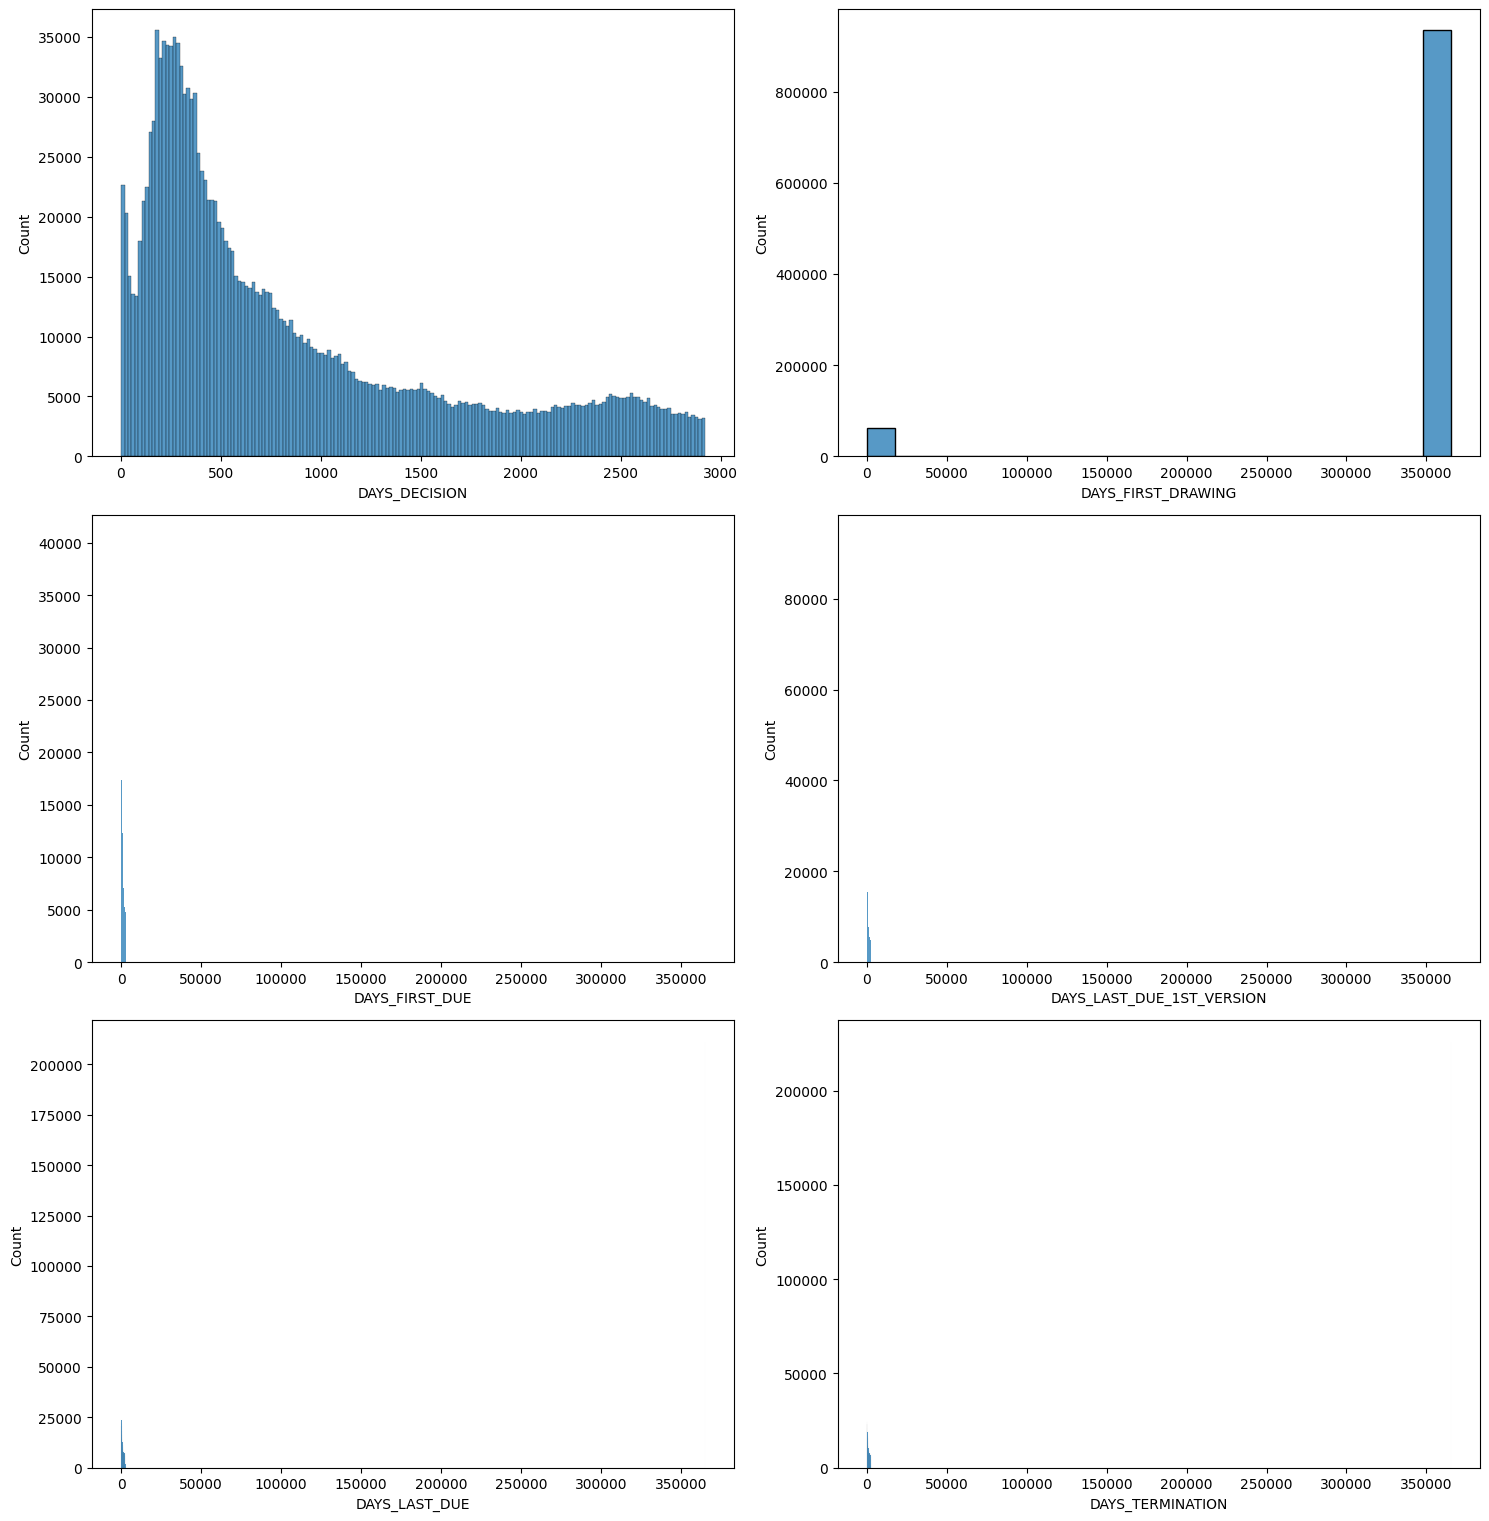

In [99]:
plt.figure(figsize=[15, 25])

for j, i in enumerate(p_days_col):
    plt.subplot(5, 2, j + 1)
    sns.histplot(pra[i][pd.notnull(pra[i])])

plt.tight_layout()
plt.show()

In [100]:
a=pd.DataFrame(pra[p_days_col])

In [101]:
nullval(a)

DAYS_FIRST_DRAWING           40.3
DAYS_FIRST_DUE               40.3
DAYS_LAST_DUE_1ST_VERSION    40.3
DAYS_LAST_DUE                40.3
DAYS_TERMINATION             40.3
DAYS_DECISION                 0.0
dtype: float64

In [102]:
for i in p_days_col:
    pra[i].fillna(pra[i].mode()[0],inplace=True)

In [103]:
nullval(a)

DAYS_FIRST_DRAWING           40.3
DAYS_FIRST_DUE               40.3
DAYS_LAST_DUE_1ST_VERSION    40.3
DAYS_LAST_DUE                40.3
DAYS_TERMINATION             40.3
DAYS_DECISION                 0.0
dtype: float64

In [104]:
pra[p_days_col]=a[p_days_col]
nullval(pra)

DAYS_FIRST_DRAWING             40.3
DAYS_TERMINATION               40.3
DAYS_LAST_DUE                  40.3
DAYS_LAST_DUE_1ST_VERSION      40.3
DAYS_FIRST_DUE                 40.3
AMT_CREDIT                      0.0
CNT_PAYMENT                     0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY            0.0
SK_ID_PREV                      0.0
NAME_YIELD_GROUP                0.0
PRODUCT_COMBINATION             0.0
NAME_GOODS_CATEGORY             0.0
NFLAG_INSURED_ON_APPROVAL       0.0
NAME_PORTFOLIO                  0.0
NAME_CLIENT_TYPE                0.0
SK_ID_CURR                      0.0
NAME_TYPE_SUITE                 0.0
CODE_REJECT_REASON              0.0
NAME_PAYMENT_TYPE               0.0
DAYS_DECISION                   0.0
NAME_CONTRACT_STATUS            0.0
NAME_CASH_LOAN_PURPOSE          0.0
NFLAG_LAST_APPL_IN_DAY          0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
HOUR_APPR_PROCESS_START     

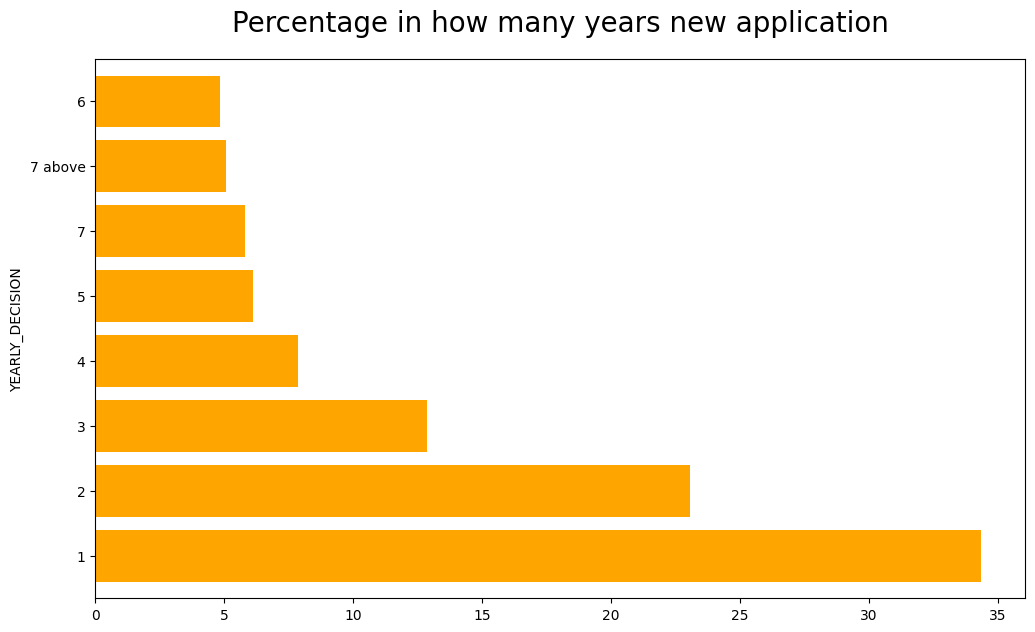

In [105]:
plt.figure(figsize = [12,7])
(pra['YEARLY_DECISION'].value_counts(normalize=True)*100).plot.barh(color= "orange",width = .8)
plt.title("Percentage in how many years new application", fontdict={"fontsize":20}, pad =20)
plt.show()

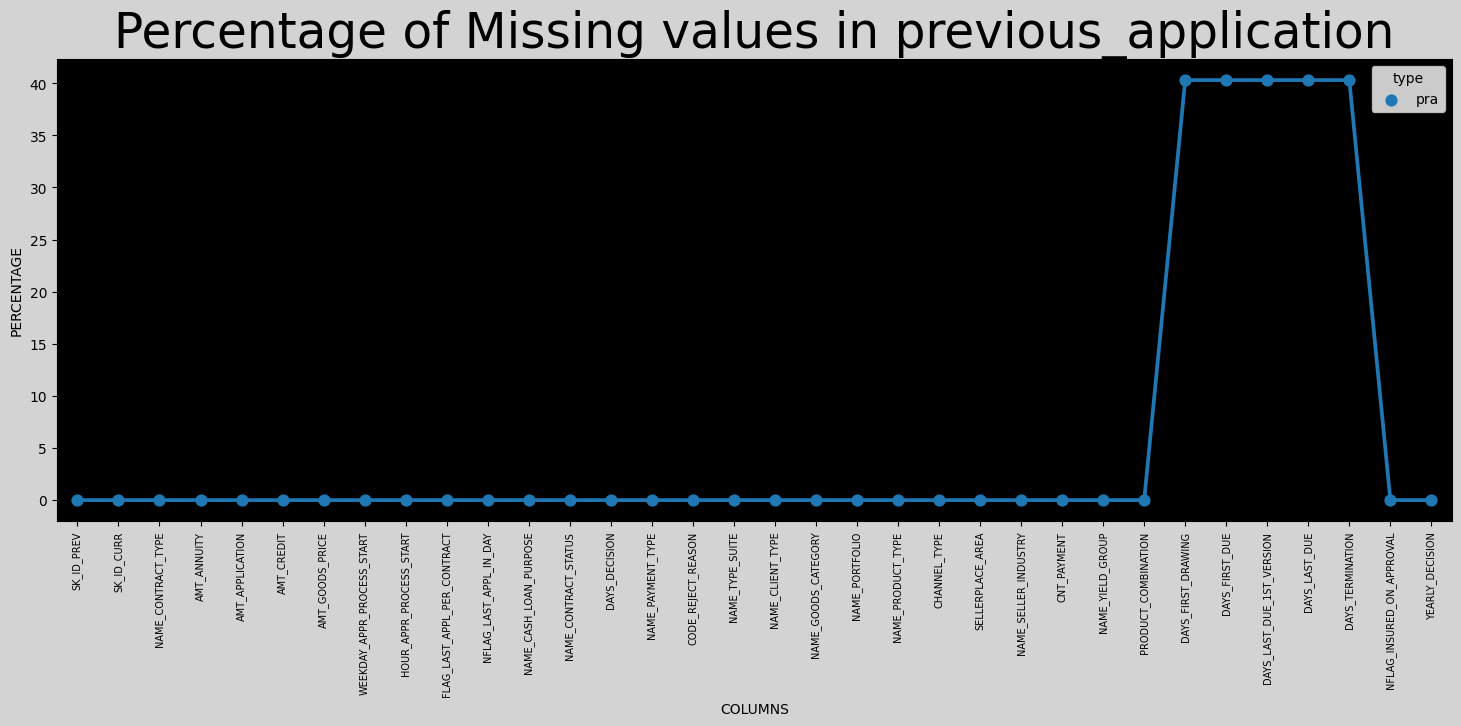

In [106]:
    fig = plt.figure(figsize=(18,6))
    miss_data = pd.DataFrame((pra.isnull().sum())*100/pra.shape[0]).reset_index()
    miss_data["type"] = "pra"
    ax = sns.pointplot(x="index",y=0,data=miss_data,hue="type")
    plt.xticks(rotation =90,fontsize =7)
    plt.title("Percentage of Missing values in previous_application",fontsize=35)
    plt.ylabel("PERCENTAGE")
    plt.xlabel("COLUMNS")
    ax.set_facecolor("k")
    fig.set_facecolor("lightgrey")

In [107]:
nullval(pra)

DAYS_FIRST_DRAWING             40.3
DAYS_TERMINATION               40.3
DAYS_LAST_DUE                  40.3
DAYS_LAST_DUE_1ST_VERSION      40.3
DAYS_FIRST_DUE                 40.3
AMT_CREDIT                      0.0
CNT_PAYMENT                     0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY            0.0
SK_ID_PREV                      0.0
NAME_YIELD_GROUP                0.0
PRODUCT_COMBINATION             0.0
NAME_GOODS_CATEGORY             0.0
NFLAG_INSURED_ON_APPROVAL       0.0
NAME_PORTFOLIO                  0.0
NAME_CLIENT_TYPE                0.0
SK_ID_CURR                      0.0
NAME_TYPE_SUITE                 0.0
CODE_REJECT_REASON              0.0
NAME_PAYMENT_TYPE               0.0
DAYS_DECISION                   0.0
NAME_CONTRACT_STATUS            0.0
NAME_CASH_LOAN_PURPOSE          0.0
NFLAG_LAST_APPL_IN_DAY          0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
HOUR_APPR_PROCESS_START     

In [108]:
pra['AMT_CREDIT'].isnull().sum()

1

In [109]:
pra['AMT_CREDIT'].fillna(pra['AMT_CREDIT'].median(),inplace=True)

In [110]:
apd.shape

(307511, 53)

In [111]:
pra.shape

(1670214, 34)

In [112]:
#outlier identification
pra.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670214e+06     1.670214e+06             1.670214e+06   
mean   1.961140e+05     1.856429e+05             1.248418e+01   
std    3.185745e+05     2.871413e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     4.500000e+04             1.000000e+01   
50%    8.054100e+04     7.105050e+04             1.200000e+01   
75%    2.164185e+05     1.804050e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count            1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06   
mean             9.964675e-01   8.806797e+02      3.139511e+02  1.247621e+01   
std              5.932963e-02   7.790997e+02      7.127443e+03  1.447588e+01   
min              0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00   
25%              1.000000e+00   2.800000e+02     -1.000000e+00  0.000000e+00   
50%              1.000000e+00   5.810000e+02      3.000000e+00  1.000000e+01   
75%              1.000000e+00   1.300000e+03      8.200000e+01  1.600000e+01   
max              1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count       997149.000000   997149.000000              997149.000000   
mean        342340.056543    15949.224065               35163.363265   
std          88413.495220    72007.270877              106405.950190   
min              2.000000        2.000000                   0.000000   
25%         365243.000000      475.000000                 257.000000   
50%         365243.000000      921.000000                 741.000000   
75%         365243.000000     1825.000000                1735.000000   
max         365243.000000   365243.000000              365243.000000   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count  997149.000000     997149.000000               1.670214e+06  
mean    78152.730207      83505.775017               1.985506e-01  
std    148833.342466     152484.418802               3.989090e-01  
min         2.000000          2.000000               0.000000e+00  
25%       455.000000        447.000000               0.000000e+00  
50%      1155.000000       1171.000000               0.000000e+00  
75%      2418.000000       2501.000000               0.000000e+00  
max    365243.000000     365243.000000               1.000000e+00

In [113]:
#from describe we could find all the columns those wo have high difference between max and 75 percentile 
#and the ones which makes no sense having max value to be so high are captured below
p_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']


C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn

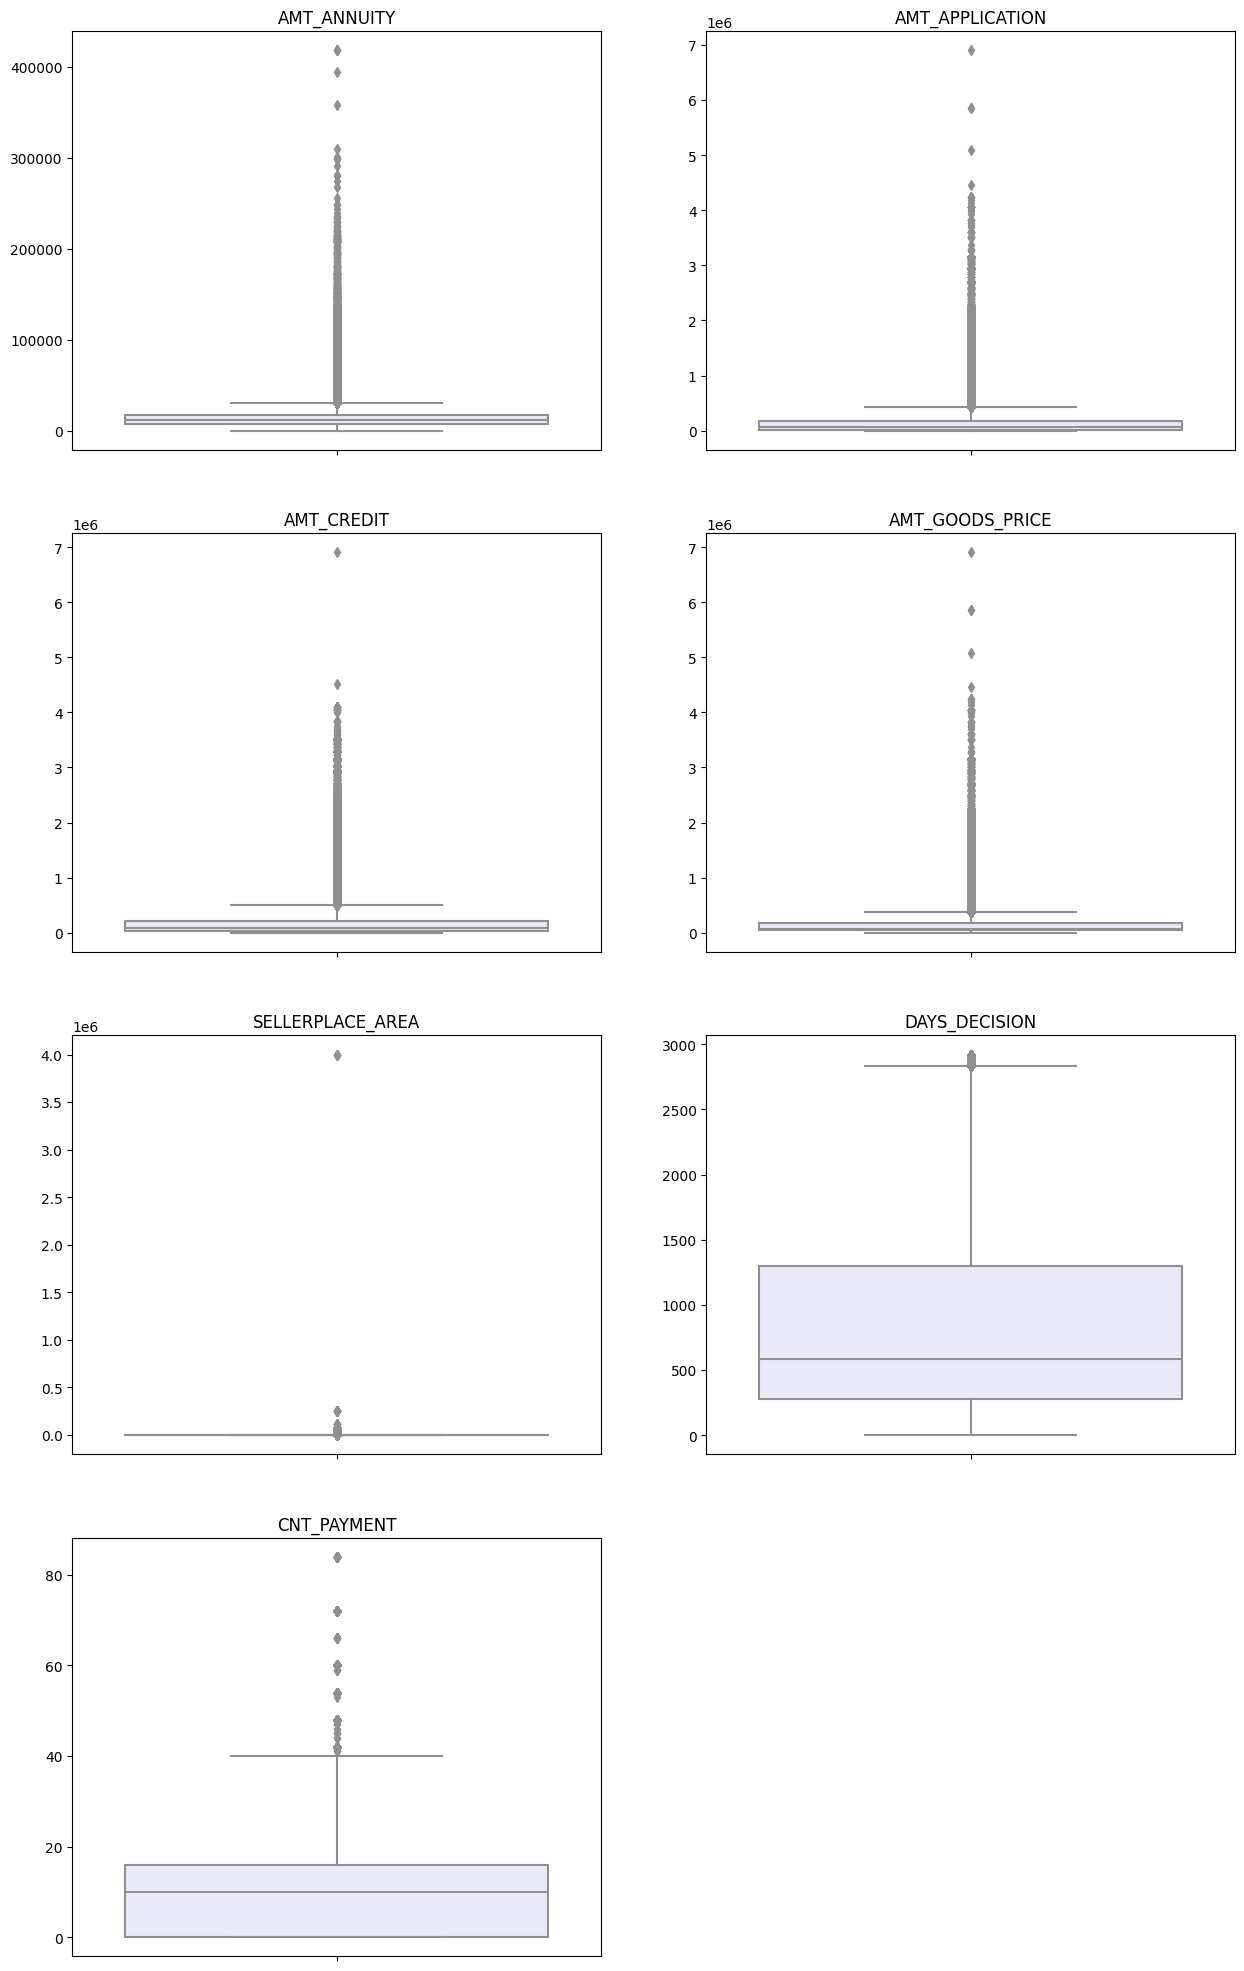

In [114]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(p_outlier_col, range(len(p_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = pra[i], orient = "h", color = "lavender")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

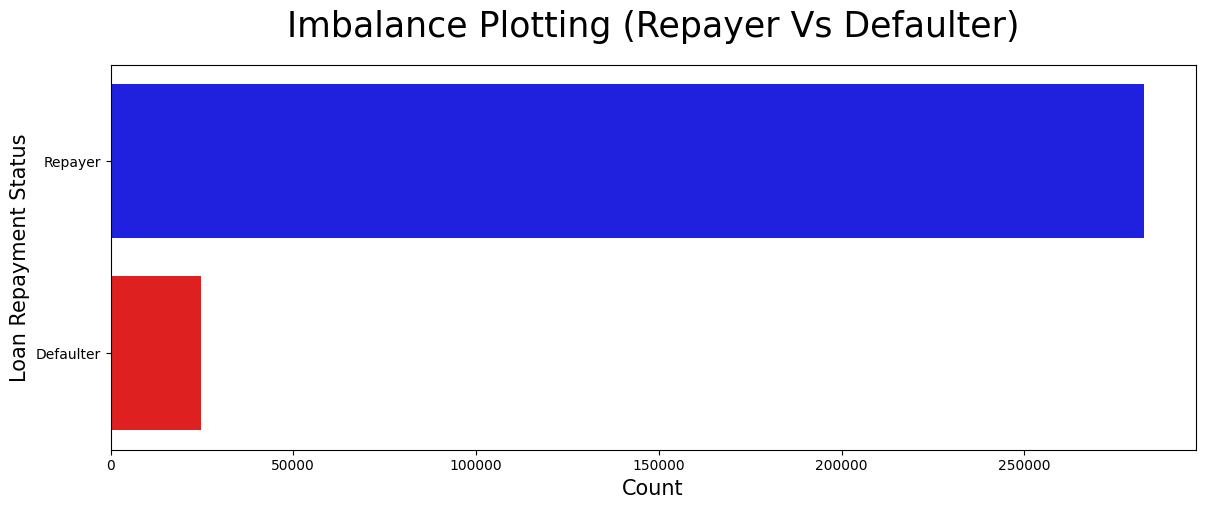

In [115]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = apd["TARGET"].value_counts(), palette = ["blue","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [116]:
a=apd['TARGET'].value_counts()
print( "No. of reapyers are ",a[0])
print("No. of defaulters are ",a[1]) 

No. of reapyers are  282686
No. of defaulters are  24825


In [117]:
#Ratio of imbalance percentage with respect to defaulter and repayer is given below 
repayer = round((apd["TARGET"].value_counts()[0]/len(apd)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((apd["TARGET"].value_counts()[1]/len(apd)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 91.93%
Defaulter Percentage is 8.07%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.39/1 (approx)


In [118]:
# Creating a function to find if the column is categorical or numerical 

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"
    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

        
        plt.show()
        

In [119]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(x+" & "+y+" BIVARAITE ANALYSIS" ,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

In [120]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()


In [121]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)


In [122]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(apd.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(apd.select_dtypes(["int","float"]).columns)  #N Numerical Column list

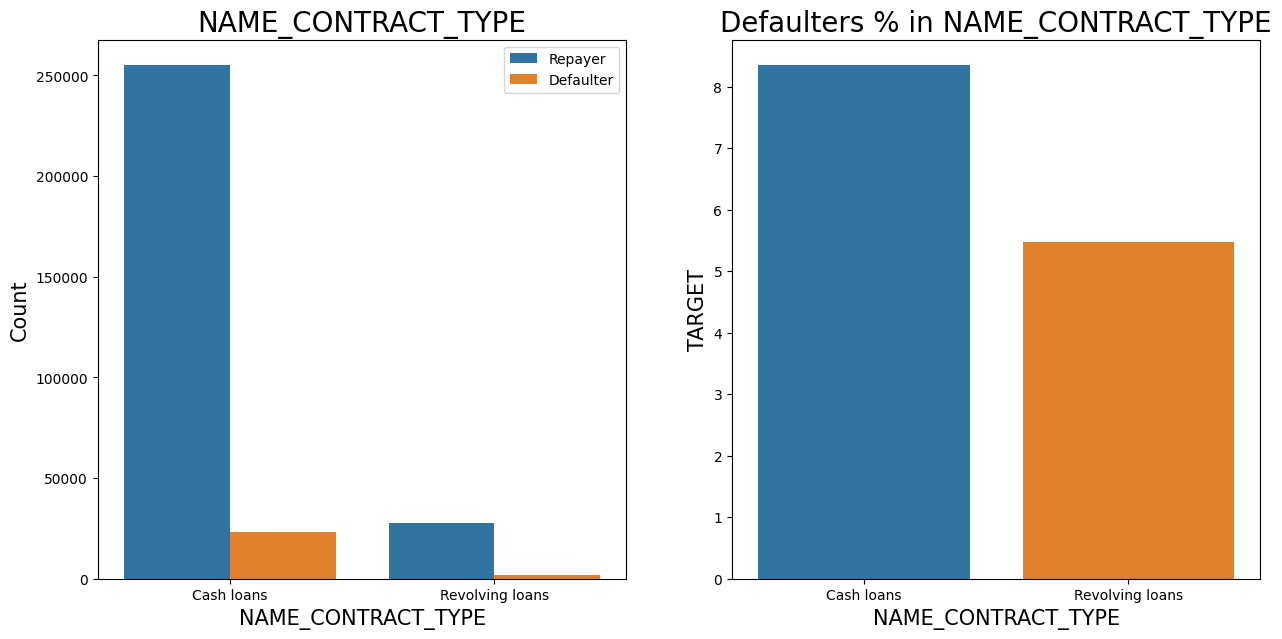

In [123]:
#CATEGORICAL SEGMENTED UNIVARAITE ANALYSIS
univariate(apd,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

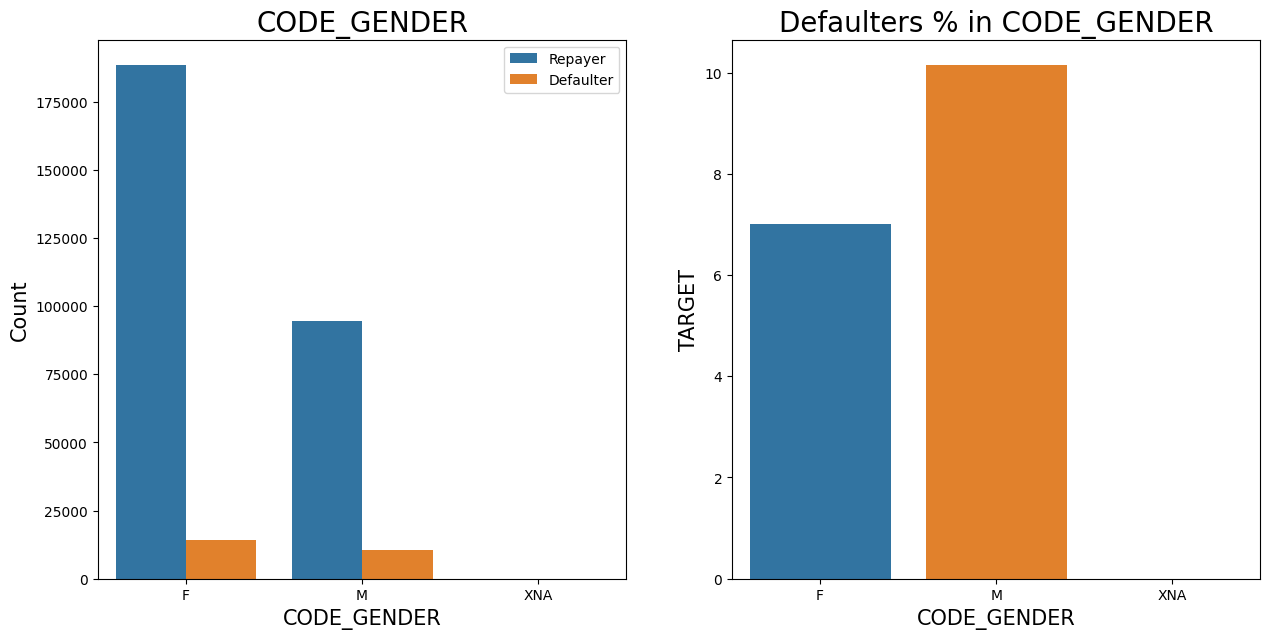

In [124]:
#2 Checking the type of Gender on loan repayment status
univariate(apd,"CODE_GENDER","TARGET",False,False,True)

In [125]:
apd.loc[:,['CODE_GENDER',"TARGET"]].value_counts()

CODE_GENDER  TARGET
F            0         188278
M            0          94404
F            1          14170
M            1          10655
XNA          0              4
Name: count, dtype: int64

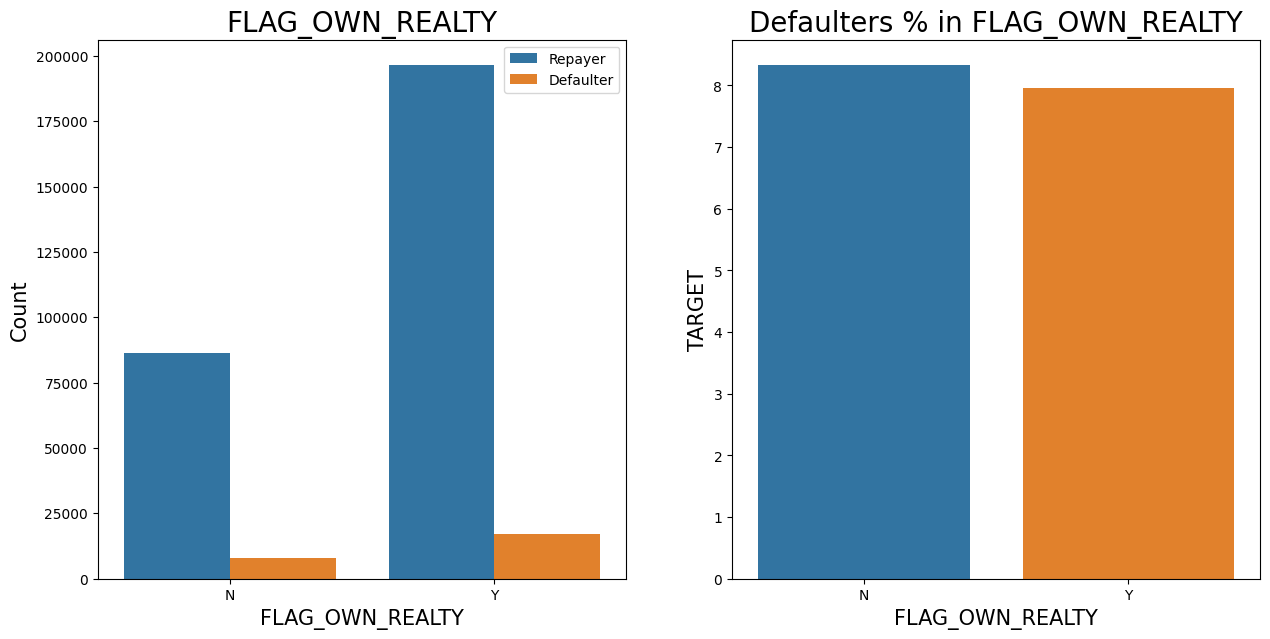

In [126]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(apd,"FLAG_OWN_REALTY","TARGET",False,False,True)

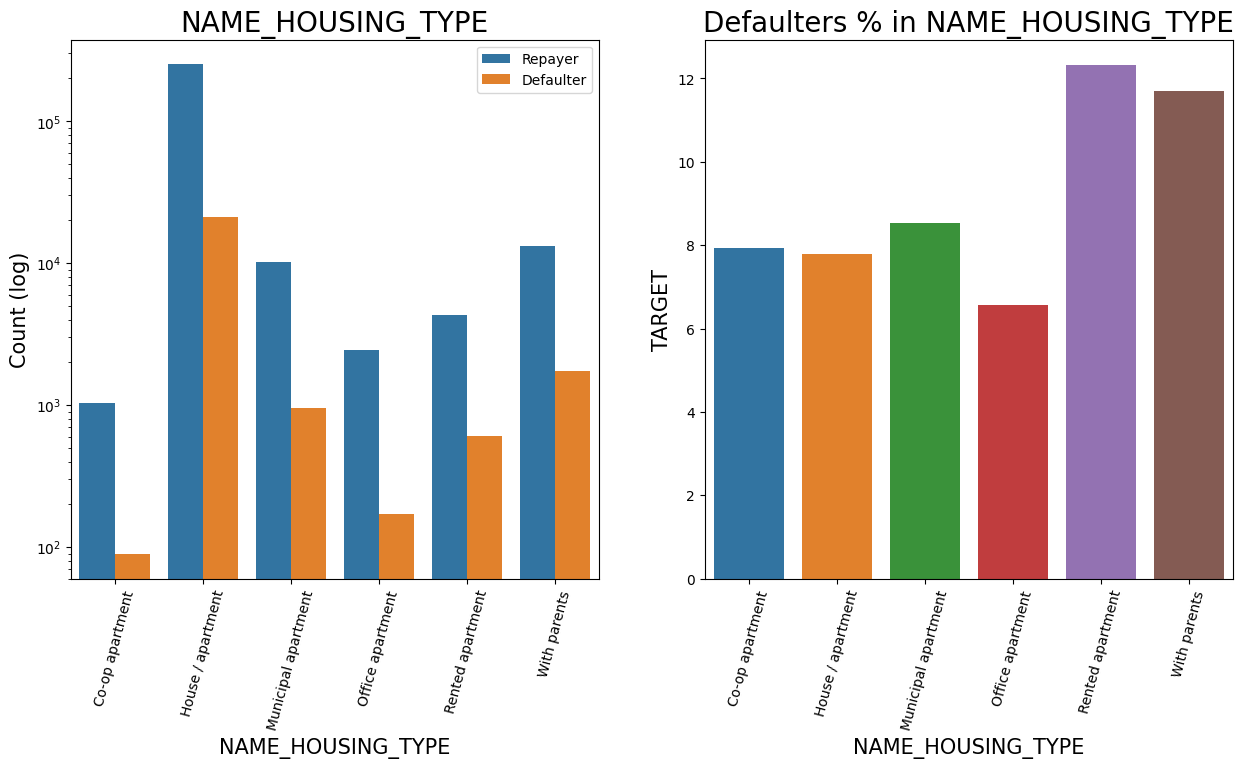

In [127]:
#4 Analyzing Housing Type based on loan repayment status
univariate(apd,"NAME_HOUSING_TYPE","TARGET",True,True,True)

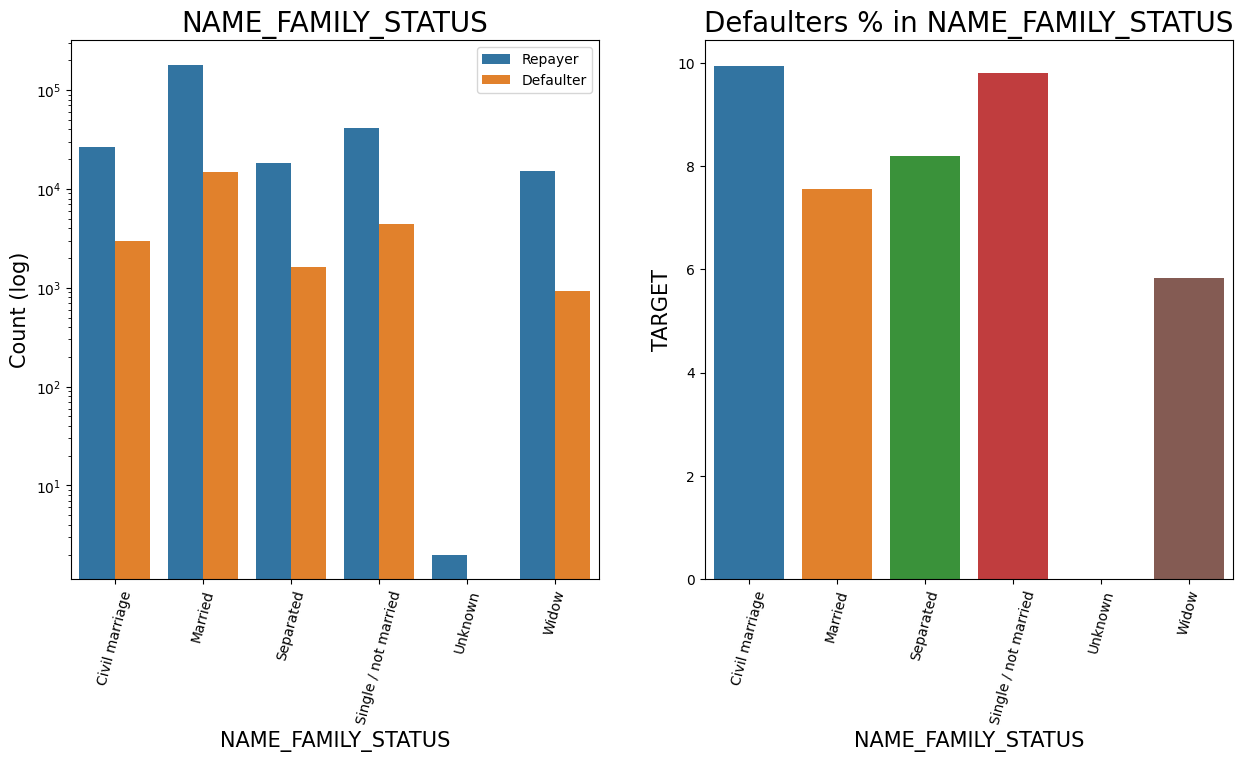

In [128]:
#5 Analyzing Family status based on loan repayment status
univariate(apd,"NAME_FAMILY_STATUS","TARGET",True,True,True)

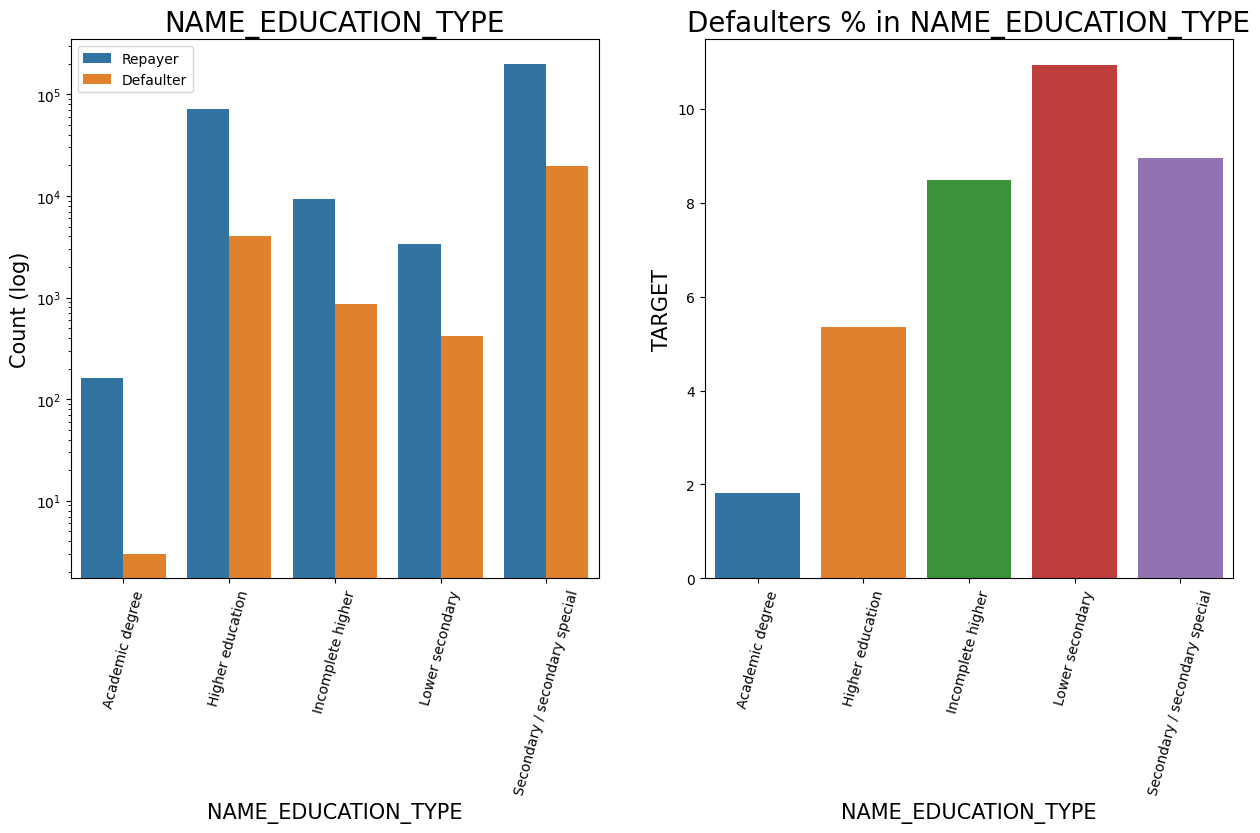

In [129]:
#6 Analyzing Education Type based on loan repayment status
univariate(apd,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

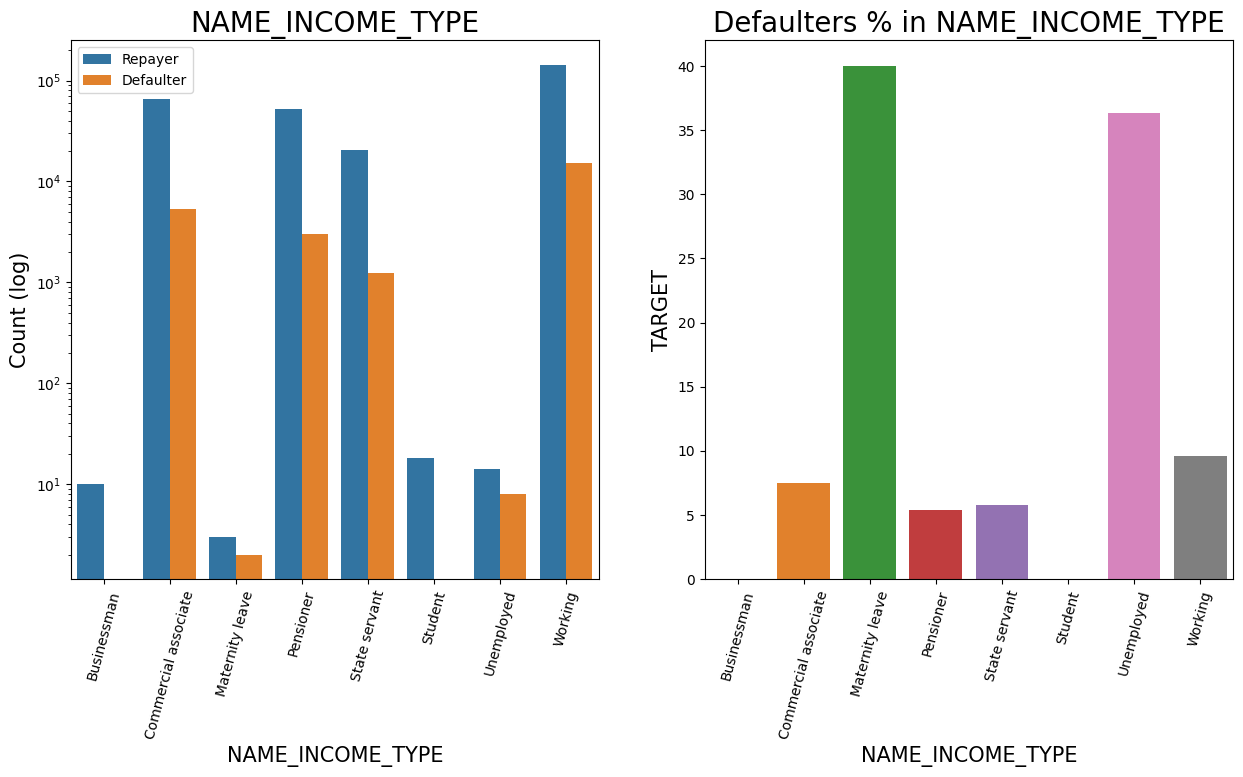

In [130]:
#7 Analyzing Income Type based on loan repayment status
univariate(apd,"NAME_INCOME_TYPE","TARGET",True,True,True)

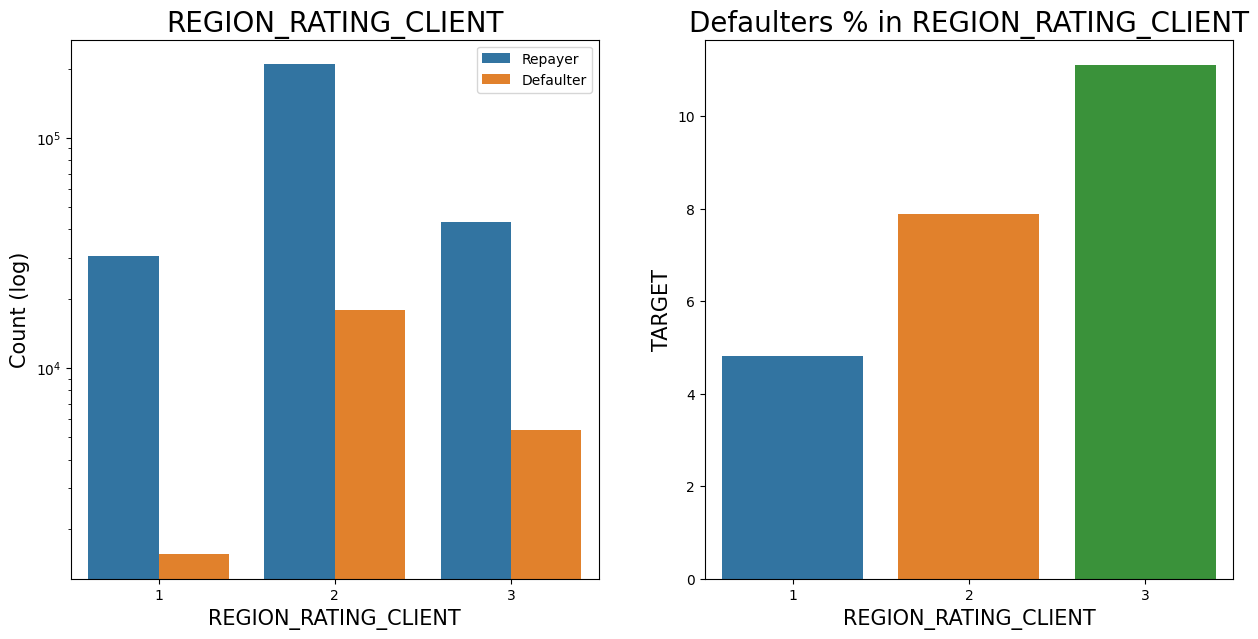

In [131]:
#8 Analyzing Region rating where applicant lives based on loan repayment status
univariate(apd,"REGION_RATING_CLIENT","TARGET",True,False,True)

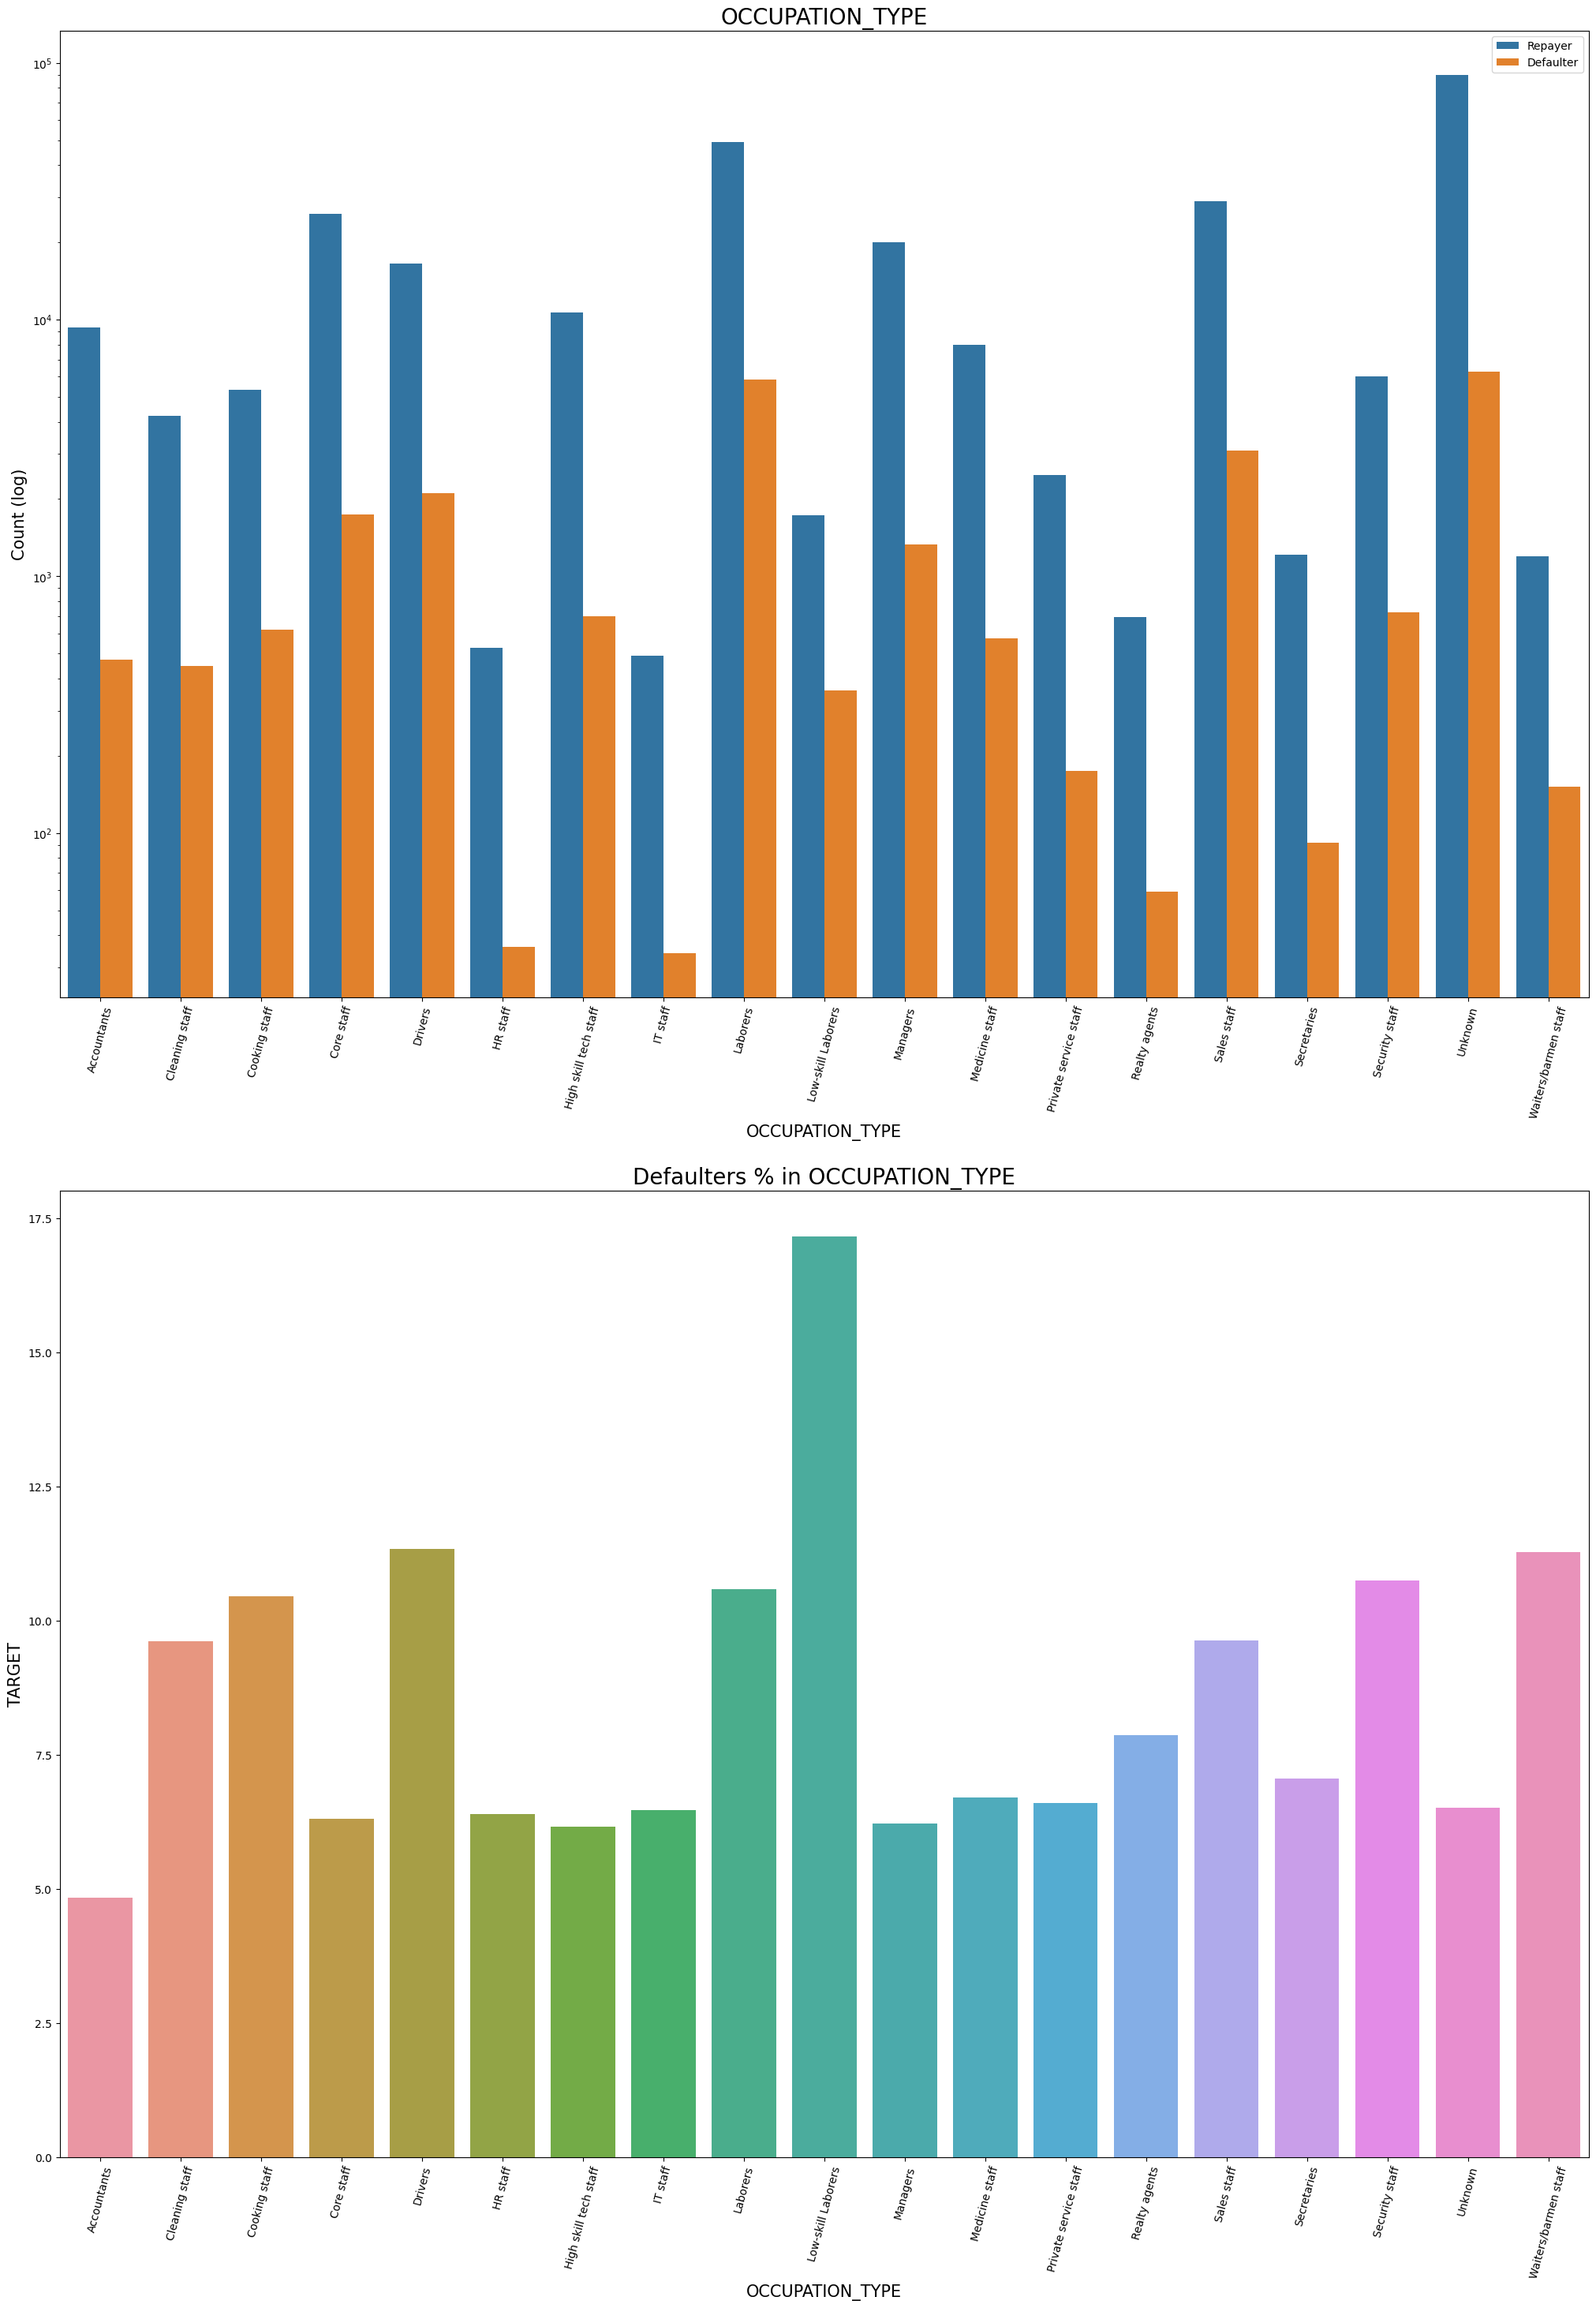

In [132]:
#9 Analyzing Occupation Type where applicant lives based on loan repayment status
univariate(apd,"OCCUPATION_TYPE","TARGET",True,True,False)

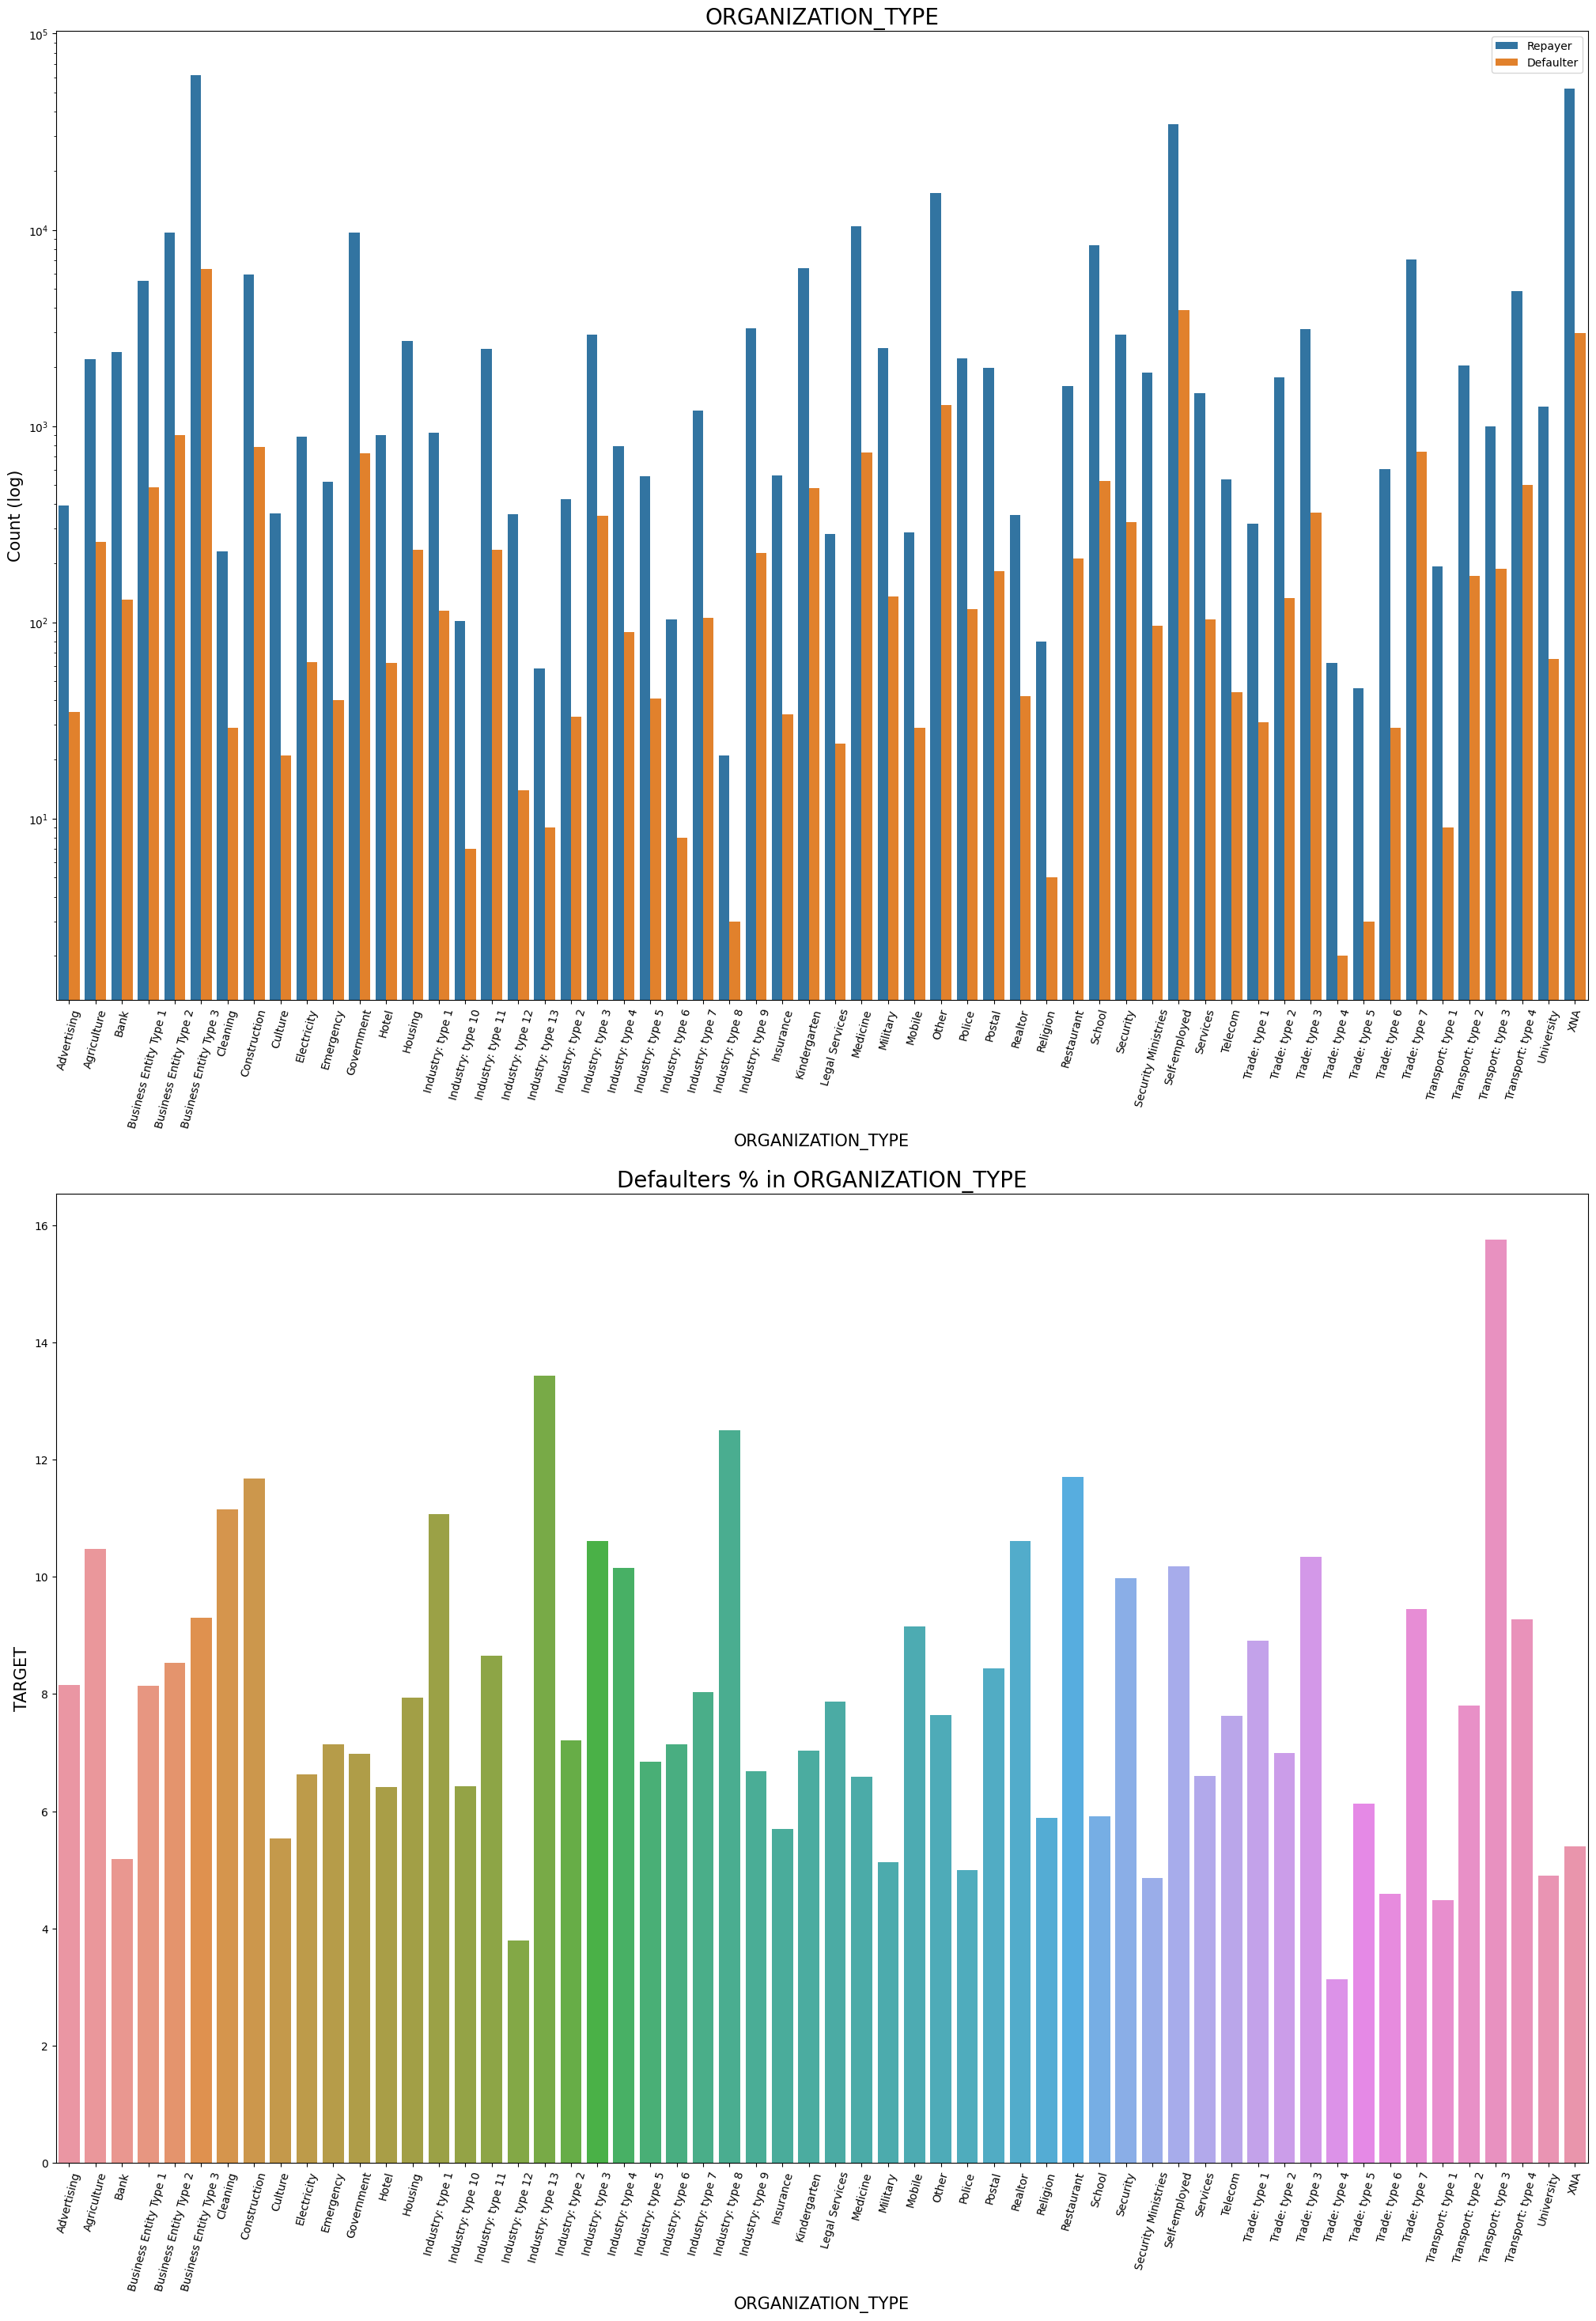

In [133]:
#10 Checking Loan repayment status based on Organization type

univariate(apd,"ORGANIZATION_TYPE","TARGET",True,True,False)

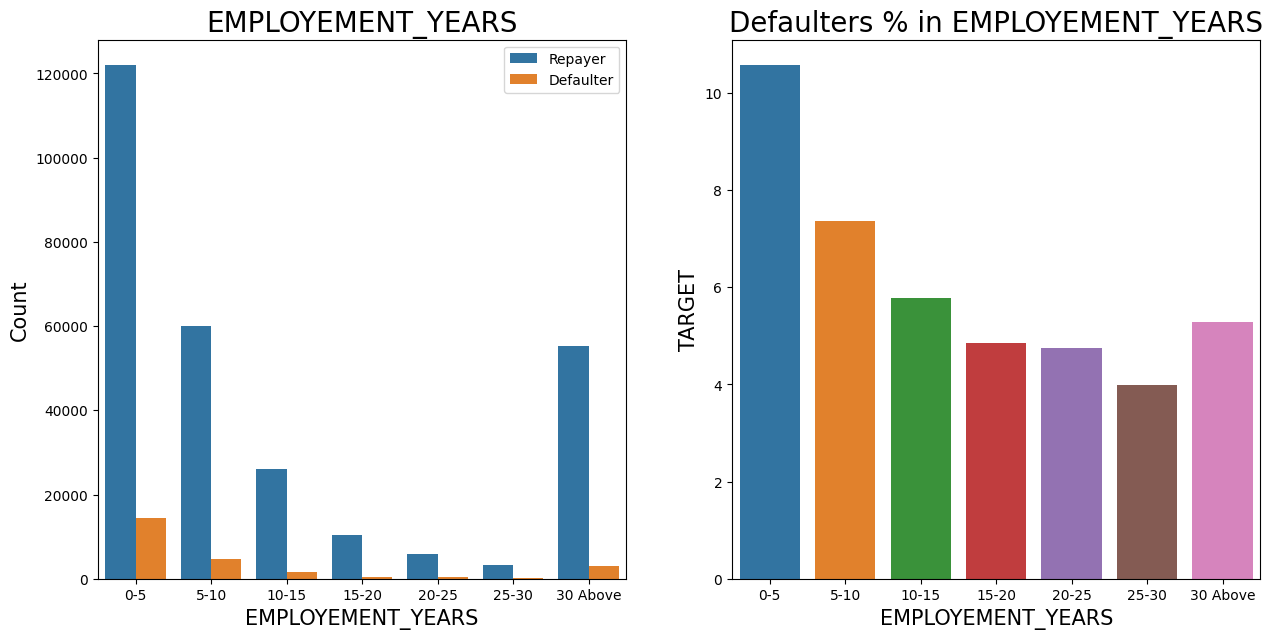

In [134]:
#11 Analyzing Employment_Year based on loan repayment status
univariate(apd,"EMPLOYEMENT_YEARS","TARGET",False,False,True)

In [135]:
apd.loc[:,["EMPLOYEMENT_YEARS","TARGET"]].value_counts()

EMPLOYEMENT_YEARS  TARGET
0-5                0         121900
5-10               0          60090
30 Above           0          55292
10-15              0          25958
0-5                1          14409
15-20              0          10323
20-25              0           5946
5-10               1           4782
25-30              0           3176
30 Above           1           3087
10-15              1           1591
15-20              1            526
20-25              1            297
25-30              1            132
Name: count, dtype: int64

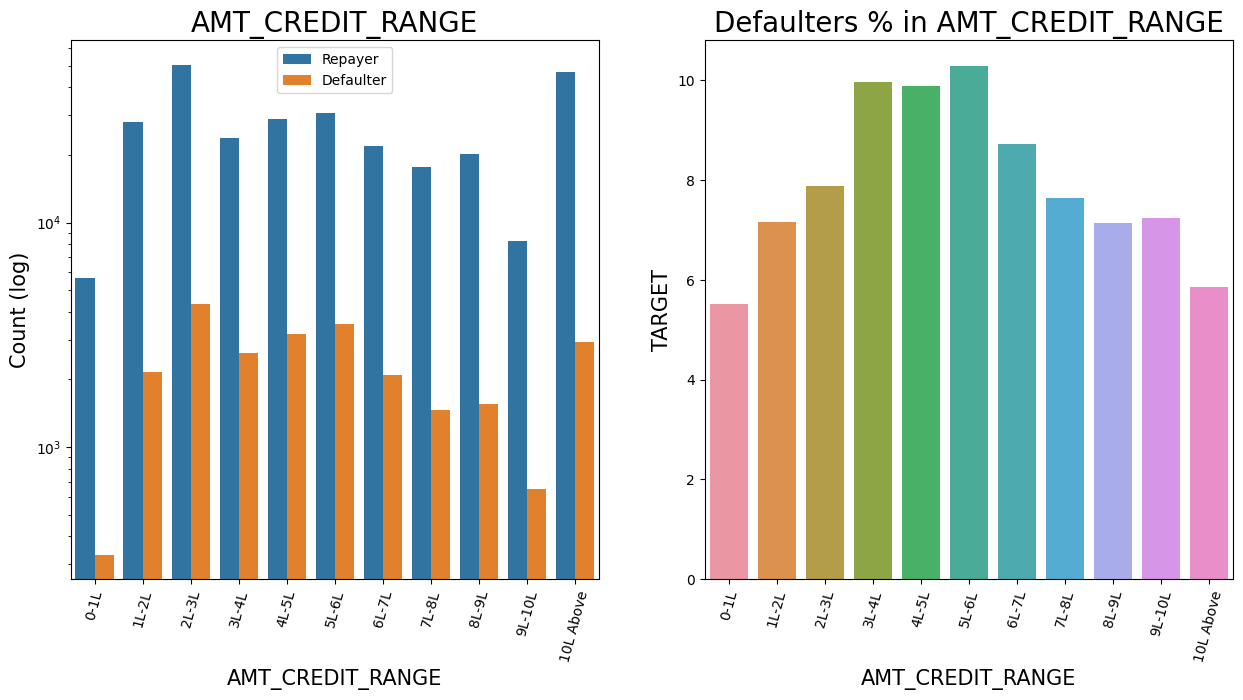

In [136]:
#12 Analyzing Amount_Credit based on loan repayment status

univariate(apd,"AMT_CREDIT_RANGE","TARGET",True,True,True)

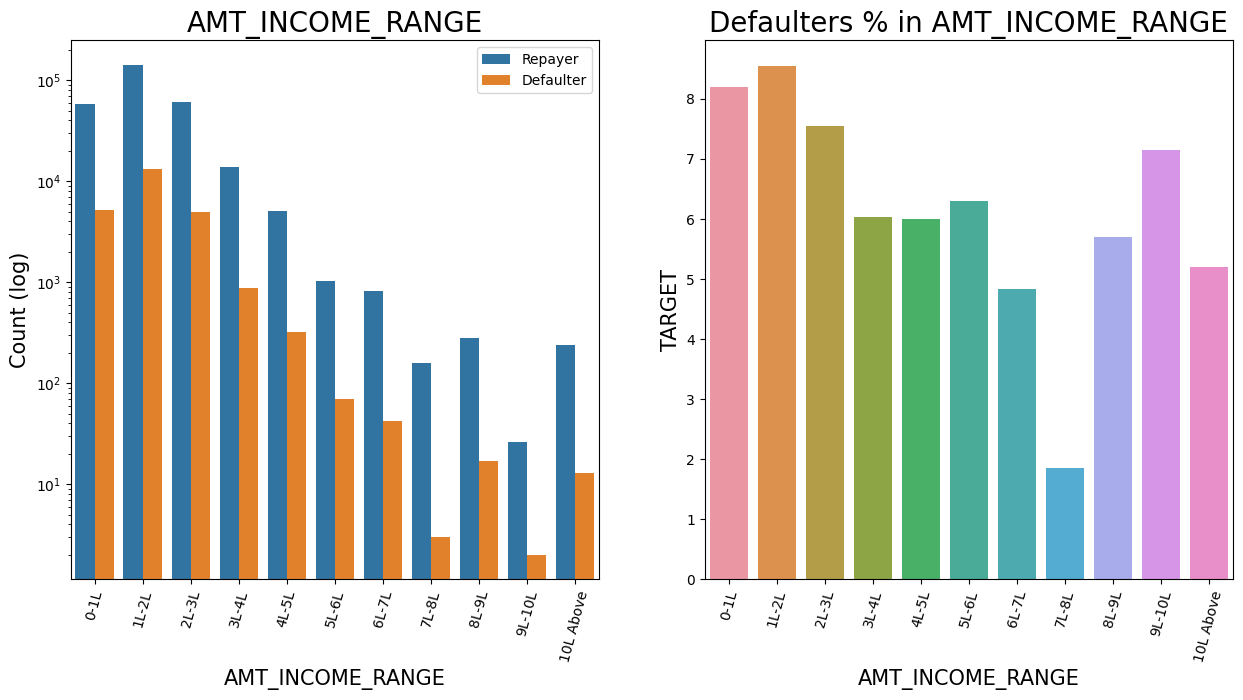

In [137]:
#13  Analyzing Amount_Income Range based on loan repayment status

univariate(apd,"AMT_INCOME_RANGE","TARGET",True,True,True)

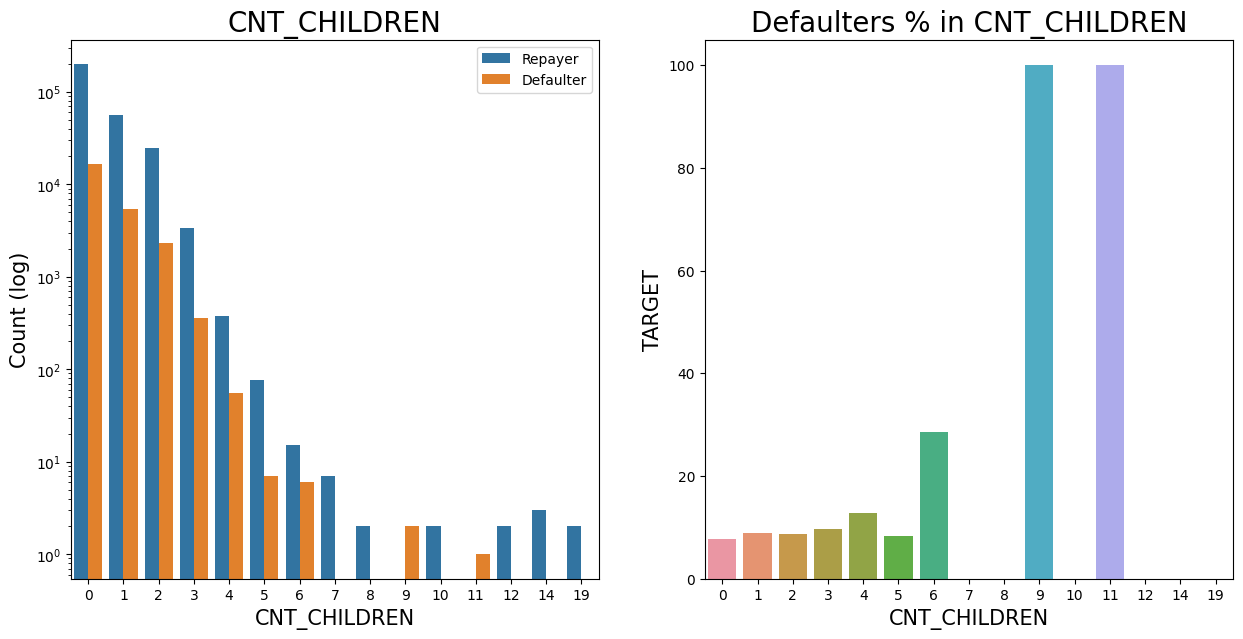

In [138]:
#14  Analyzing Number of children based on loan repayment status

univariate(apd,"CNT_CHILDREN","TARGET",True,False,True)

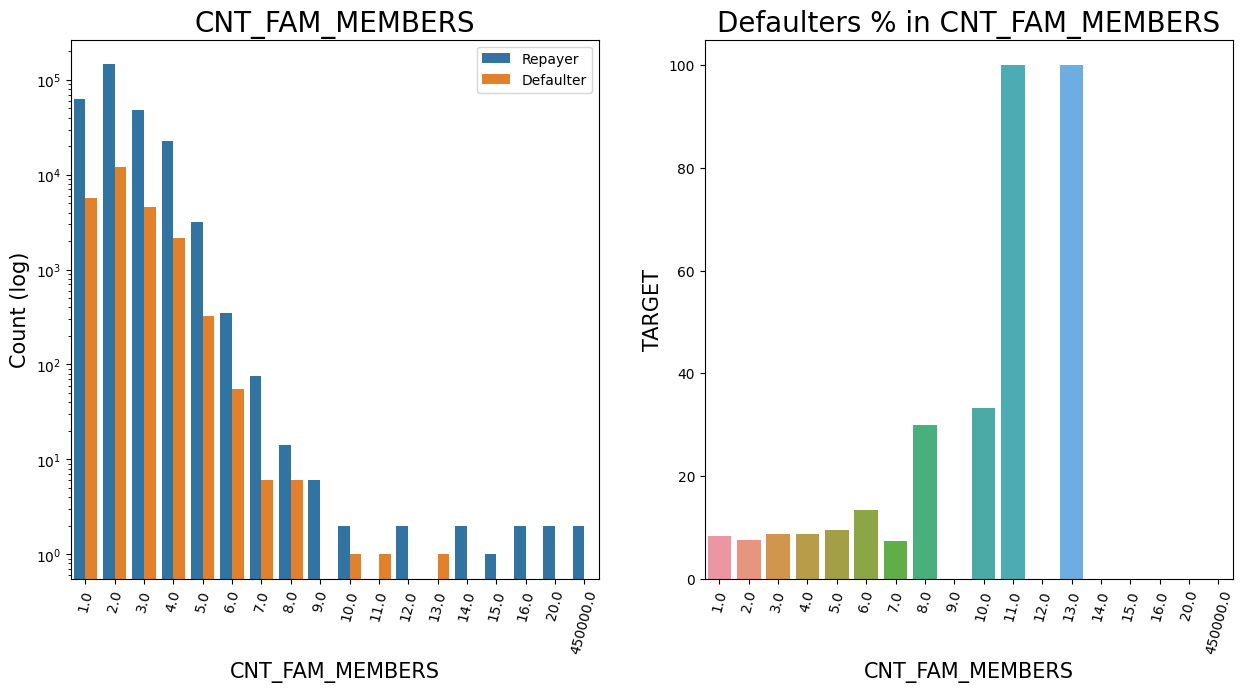

In [139]:
#15 Analyzing Number of family members based on loan repayment status
univariate(apd,"CNT_FAM_MEMBERS","TARGET",True,True,True)

In [140]:
#MULTI/BI VARAITE ANALYSIS
apd.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%  \
NAME_INCOME_TYPE                                                            
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500   
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000   
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000   
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700   
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750   
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750   
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875   
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500   

                          75%        max  
NAME_INCOME_TYPE                          
Businessman           8.43750    22.5000  
Commercial associate  2.25000   180.0009  
Maternity leave       1.35000     3.6000  
Pensioner             1.66500    22.5000  
State servant         2.25000    31.5000  
Student               1.78875     5.6250  
Unemployed            1.35000     3.3750  
Working               2.02500  1170.0000

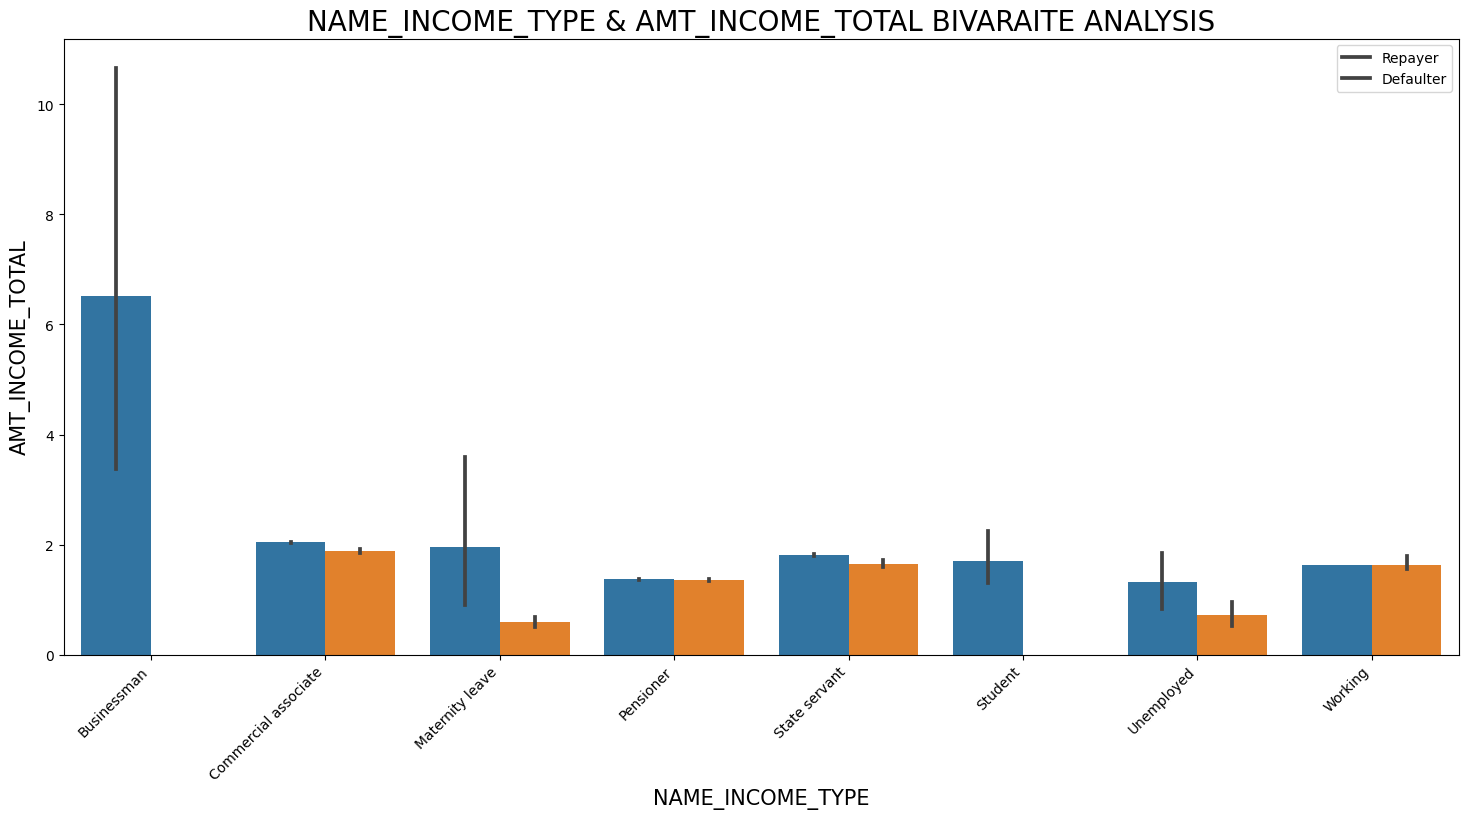

In [141]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",apd,"TARGET",(18,8),['Repayer','Defaulter'])

In [142]:
#numeric varaible analysis
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = apd.loc[apd['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = apd.loc[apd['TARGET']==1, cols_for_correlation]

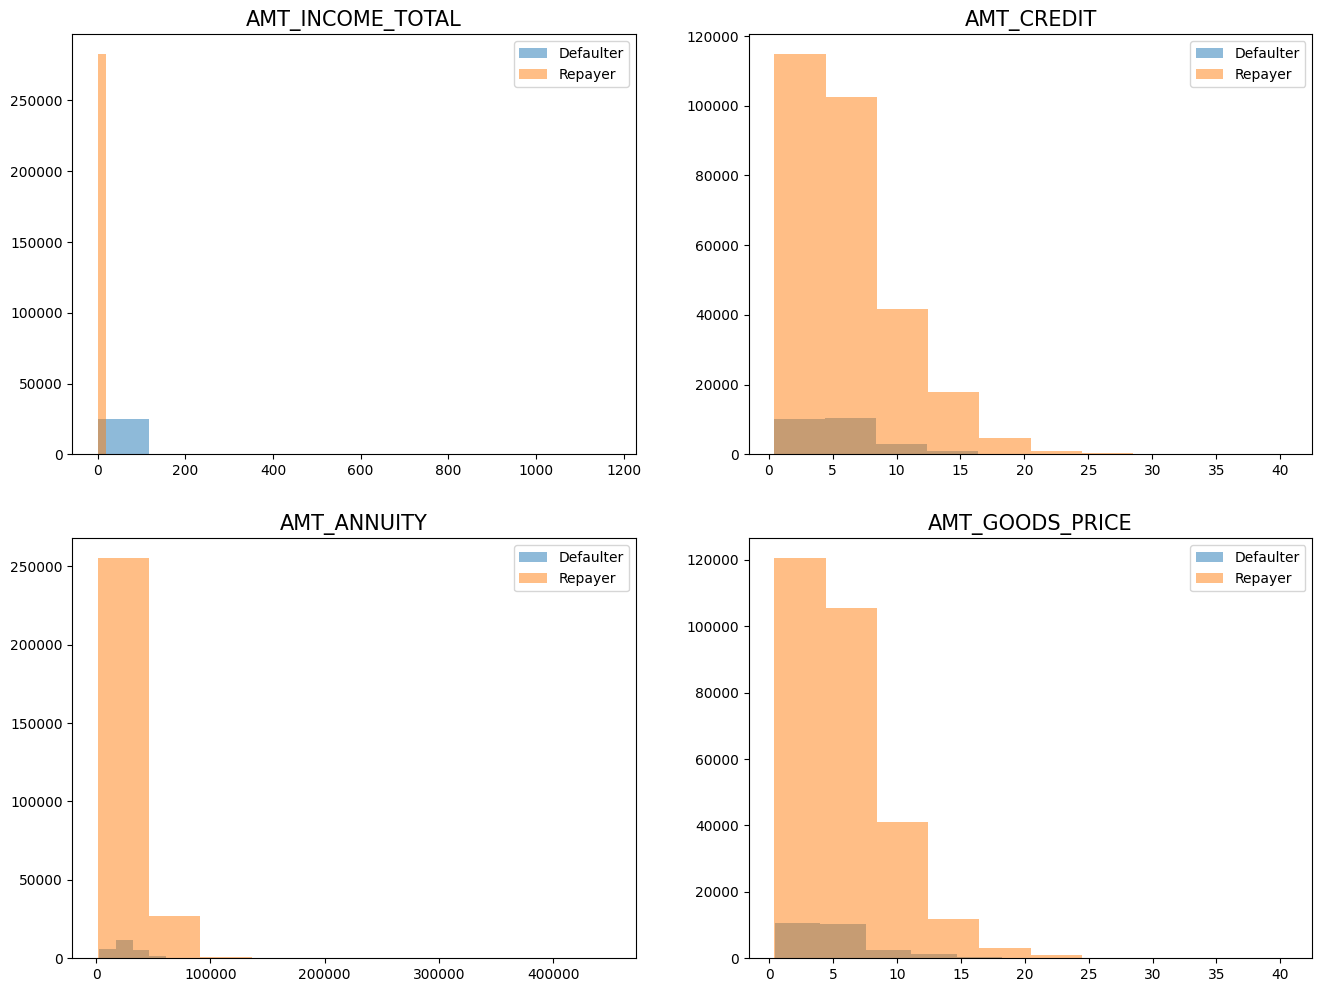

In [144]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = apd[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16, 12))

for i, col in enumerate(amount):
    plt.subplot(2, 2, i+1)
    plt.hist(Defaulter_df[col], alpha=0.5, label='Defaulter')
    plt.hist(Repayer_df[col], alpha=0.5, label='Repayer')
    plt.title(col, fontdict={'fontsize': 15, 'fontweight': 5})
    plt.legend()

plt.show()

C:\Users\Sethu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

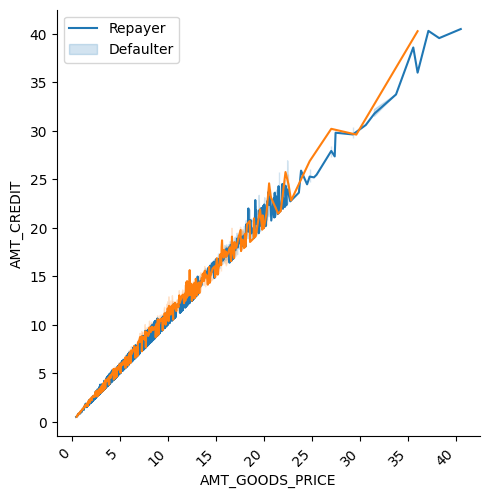

In [145]:
#NUMERICAL VARIABLES' BIVARIATE ANALYSIS
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',apd,"TARGET", "line",['Repayer','Defaulter'])

In [149]:
#MERGING DATASETS
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan_df = pd.merge(apd, pra, how='inner', on='SK_ID_CURR')
loan_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1           Cash loans           M               Y   
1      100003       0           Cash loans           F               N   
2      100003       0           Cash loans           F               N   
3      100003       0           Cash loans           F               N   
4      100004       0      Revolving loans           M               Y   

  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0            0             2.025      4.065975        24700.5   
1            0             2.700     12.935025        35698.5   
2            0             2.700     12.935025        35698.5   
3            0             2.700     12.935025        35698.5   
4            0             0.675      1.350000         6750.0   

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0              3.510     Unaccompanied          Working   
1             11.295            Family    State servant   
2             11.295            Family    State servant   
3             11.295            Family    State servant   
4              1.350     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0             2120           1        Laborers             1.0   
1              291           1      Core staff             2.0   
2              291           1      Core staff             2.0   
3              291           1      Core staff             2.0   
4             2531           1        Laborers             1.0   

  REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0                    2                           2   
1                    1                           1   
2                    1                           1   
3                    1                           1   
4                    2                           2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

  LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY  \
0                           0                      0                      0   
1                           0                      0                      0   
2                           0                      0                      0   
3                           0                      0                      0   
4                           0

In [150]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

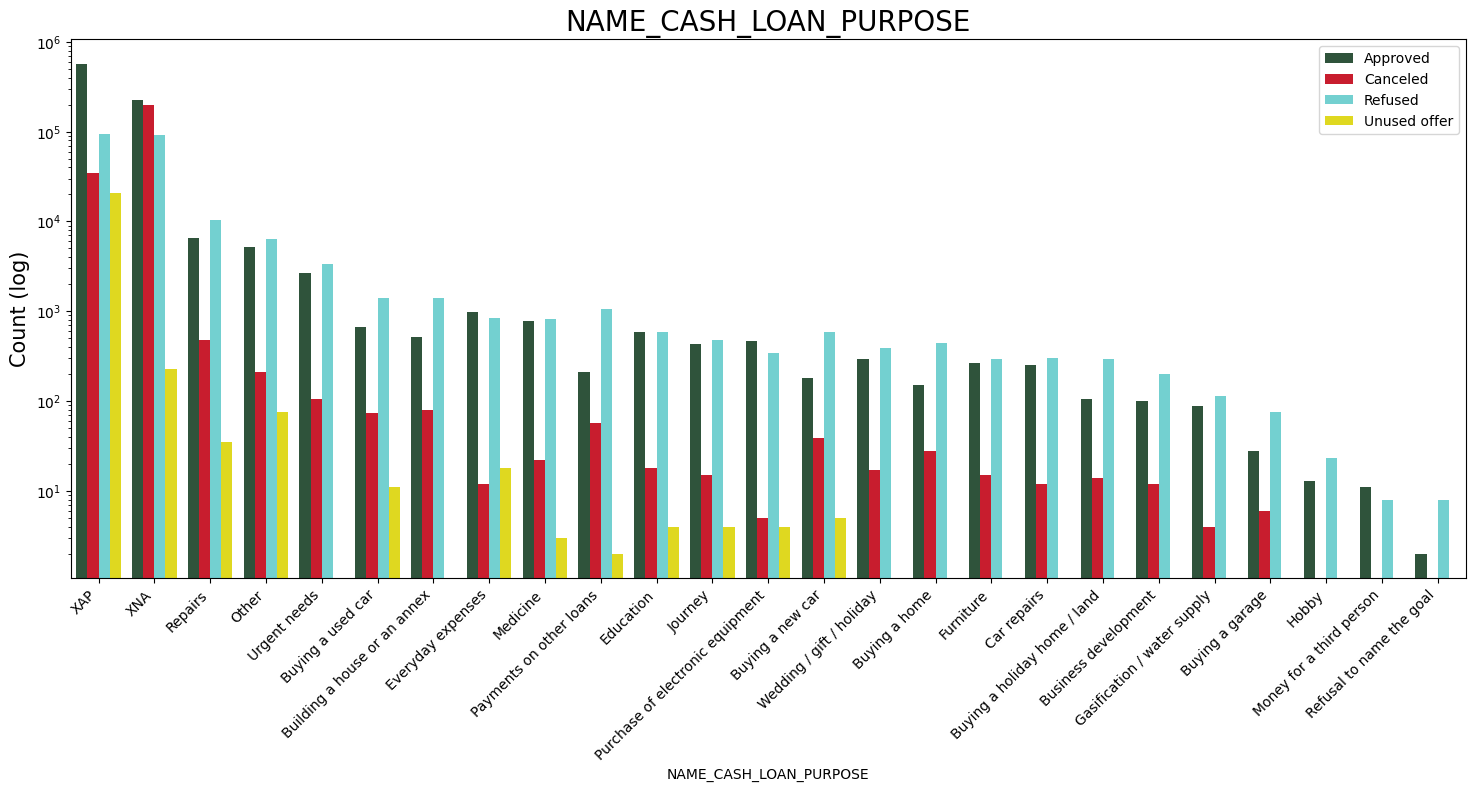

In [151]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

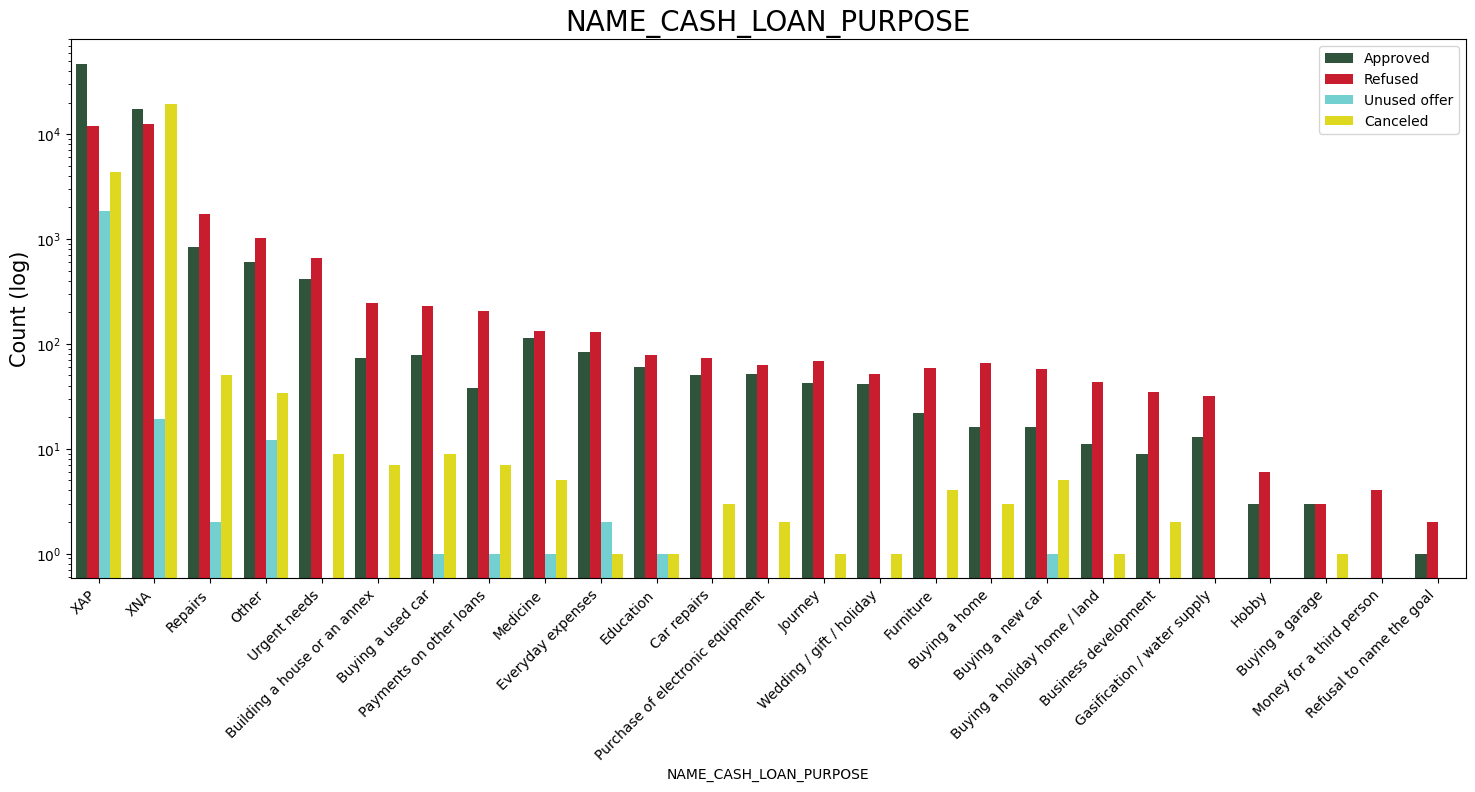

In [152]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

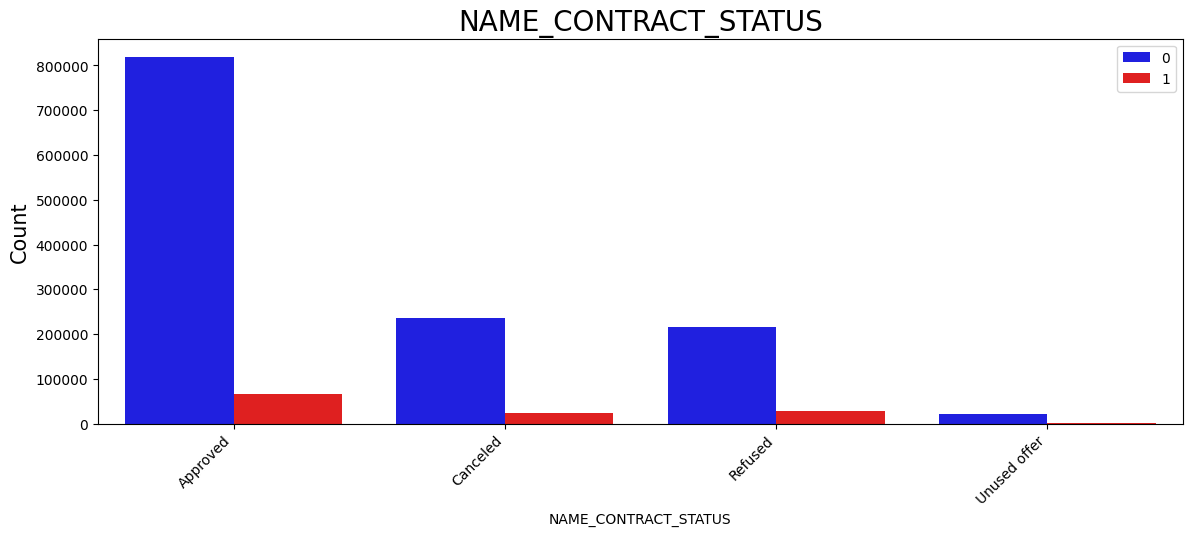

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

In [153]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['b','r'],False,(14,5))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

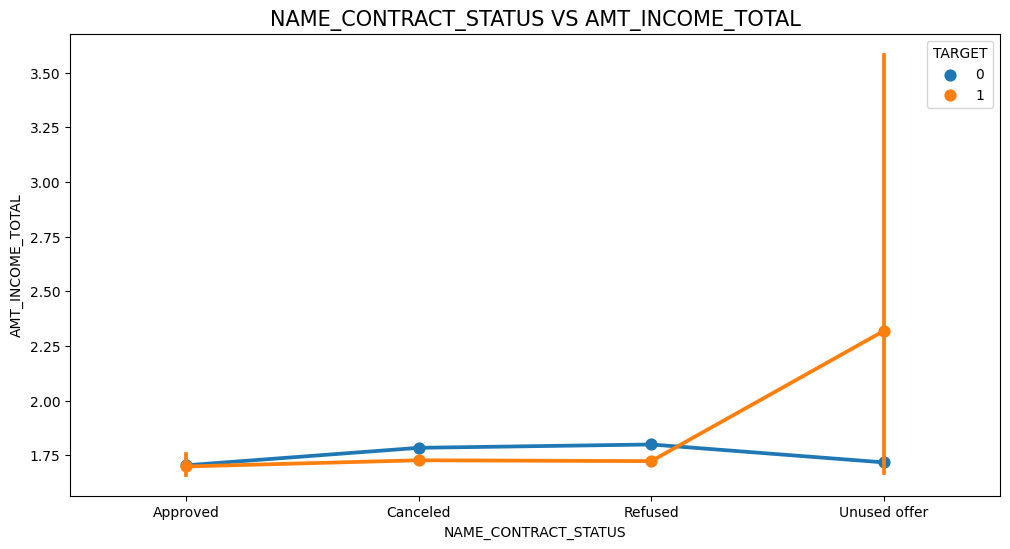

In [154]:
# plotting the relationship between income total and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

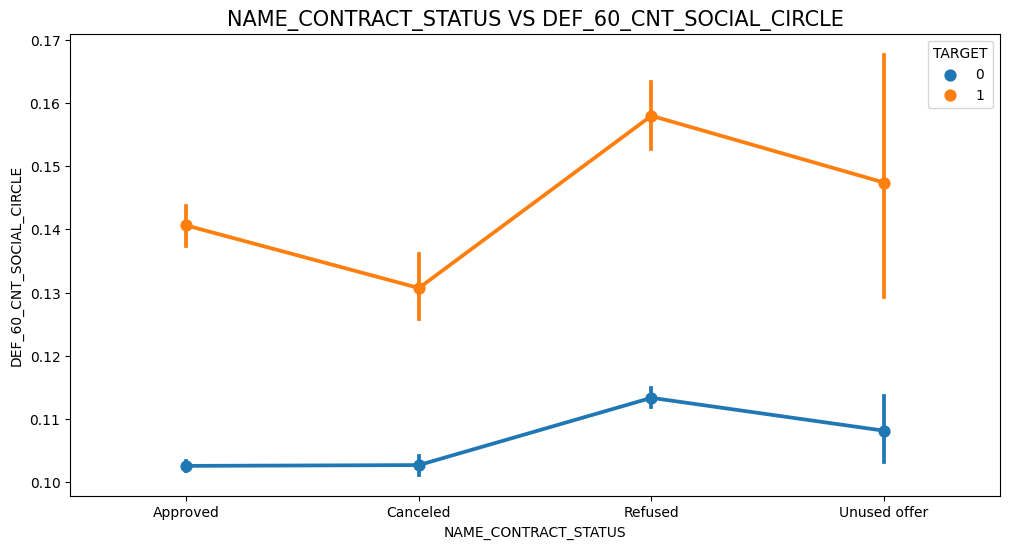

In [155]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

In [158]:
# Handle missing values and convert columns to numeric
Repayer_df_numeric = Repayer_df.apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
corr_repayer = Repayer_df_numeric.corr()

# Perform the rest of the code for obtaining top correlations
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape), k=1).astype(np.bool_)).unstack().reset_index()
corr_df_repayer.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df_repayer.dropna(subset=["Correlation"], inplace=True)
corr_df_repayer["Correlation"] = corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
top_10_corr_repayer = corr_df_repayer.head(10)

print(top_10_corr_repayer)

                             VAR1                        VAR2  Correlation
292               AMT_GOODS_PRICE                  AMT_CREDIT     0.987022
881   REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950149
1091  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
1217      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381
293               AMT_GOODS_PRICE                 AMT_ANNUITY     0.762953
251                   AMT_ANNUITY                  AMT_CREDIT     0.757916
629                 DAYS_EMPLOYED                  DAYS_BIRTH     0.626114
833          REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.539005
874   REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.537301
1049   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.446101


In [161]:
# Select only numeric columns
numeric_columns = Defaulter_df.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_repayer = numeric_columns.corr()

# Perform the rest of the code for obtaining top correlations
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape), k=1).astype(np.bool_)).unstack().reset_index()
corr_df_repayer.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df_repayer.dropna(subset=["Correlation"], inplace=True)
corr_df_repayer["Correlation"] = corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
top_10_corr_repayer = corr_df_repayer.head(10)

print(top_10_corr_repayer)

                          VAR1                        VAR2  Correlation
64             AMT_GOODS_PRICE                  AMT_CREDIT     0.982783
65             AMT_GOODS_PRICE                 AMT_ANNUITY     0.752295
43                 AMT_ANNUITY                  AMT_CREDIT     0.752195
131              DAYS_EMPLOYED                  DAYS_BIRTH     0.582185
152          DAYS_REGISTRATION                  DAYS_BIRTH     0.289114
300            FLAG_DOCUMENT_3               DAYS_EMPLOYED     0.272169
263   DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.264357
173            DAYS_ID_PUBLISH                  DAYS_BIRTH     0.252863
351  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR     0.247511
174            DAYS_ID_PUBLISH               DAYS_EMPLOYED     0.229090


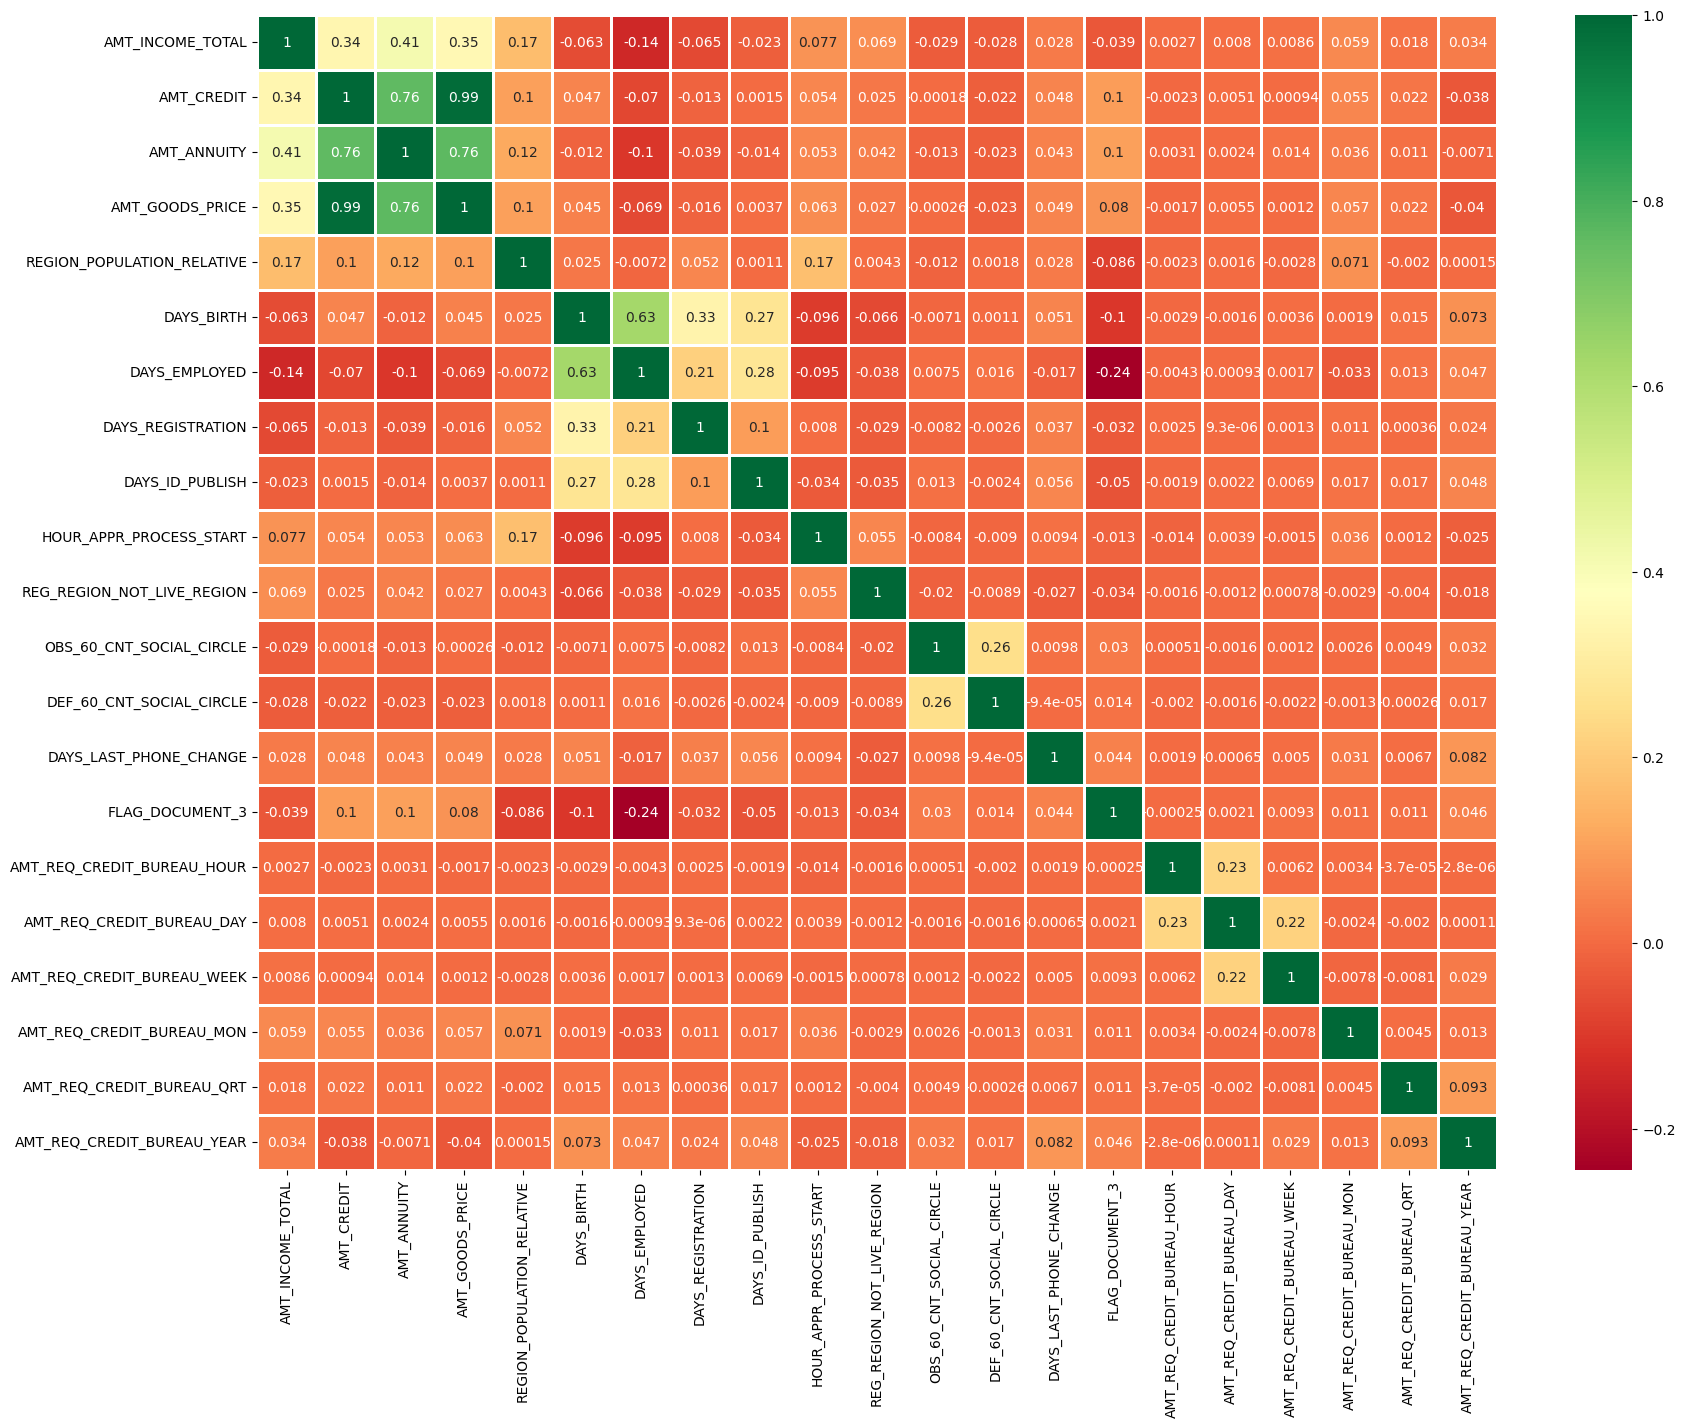

In [164]:
# Select only numeric columns
numeric_columns = Repayer_df.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap="RdYlGn", annot=True, linewidths=1)
plt.show()

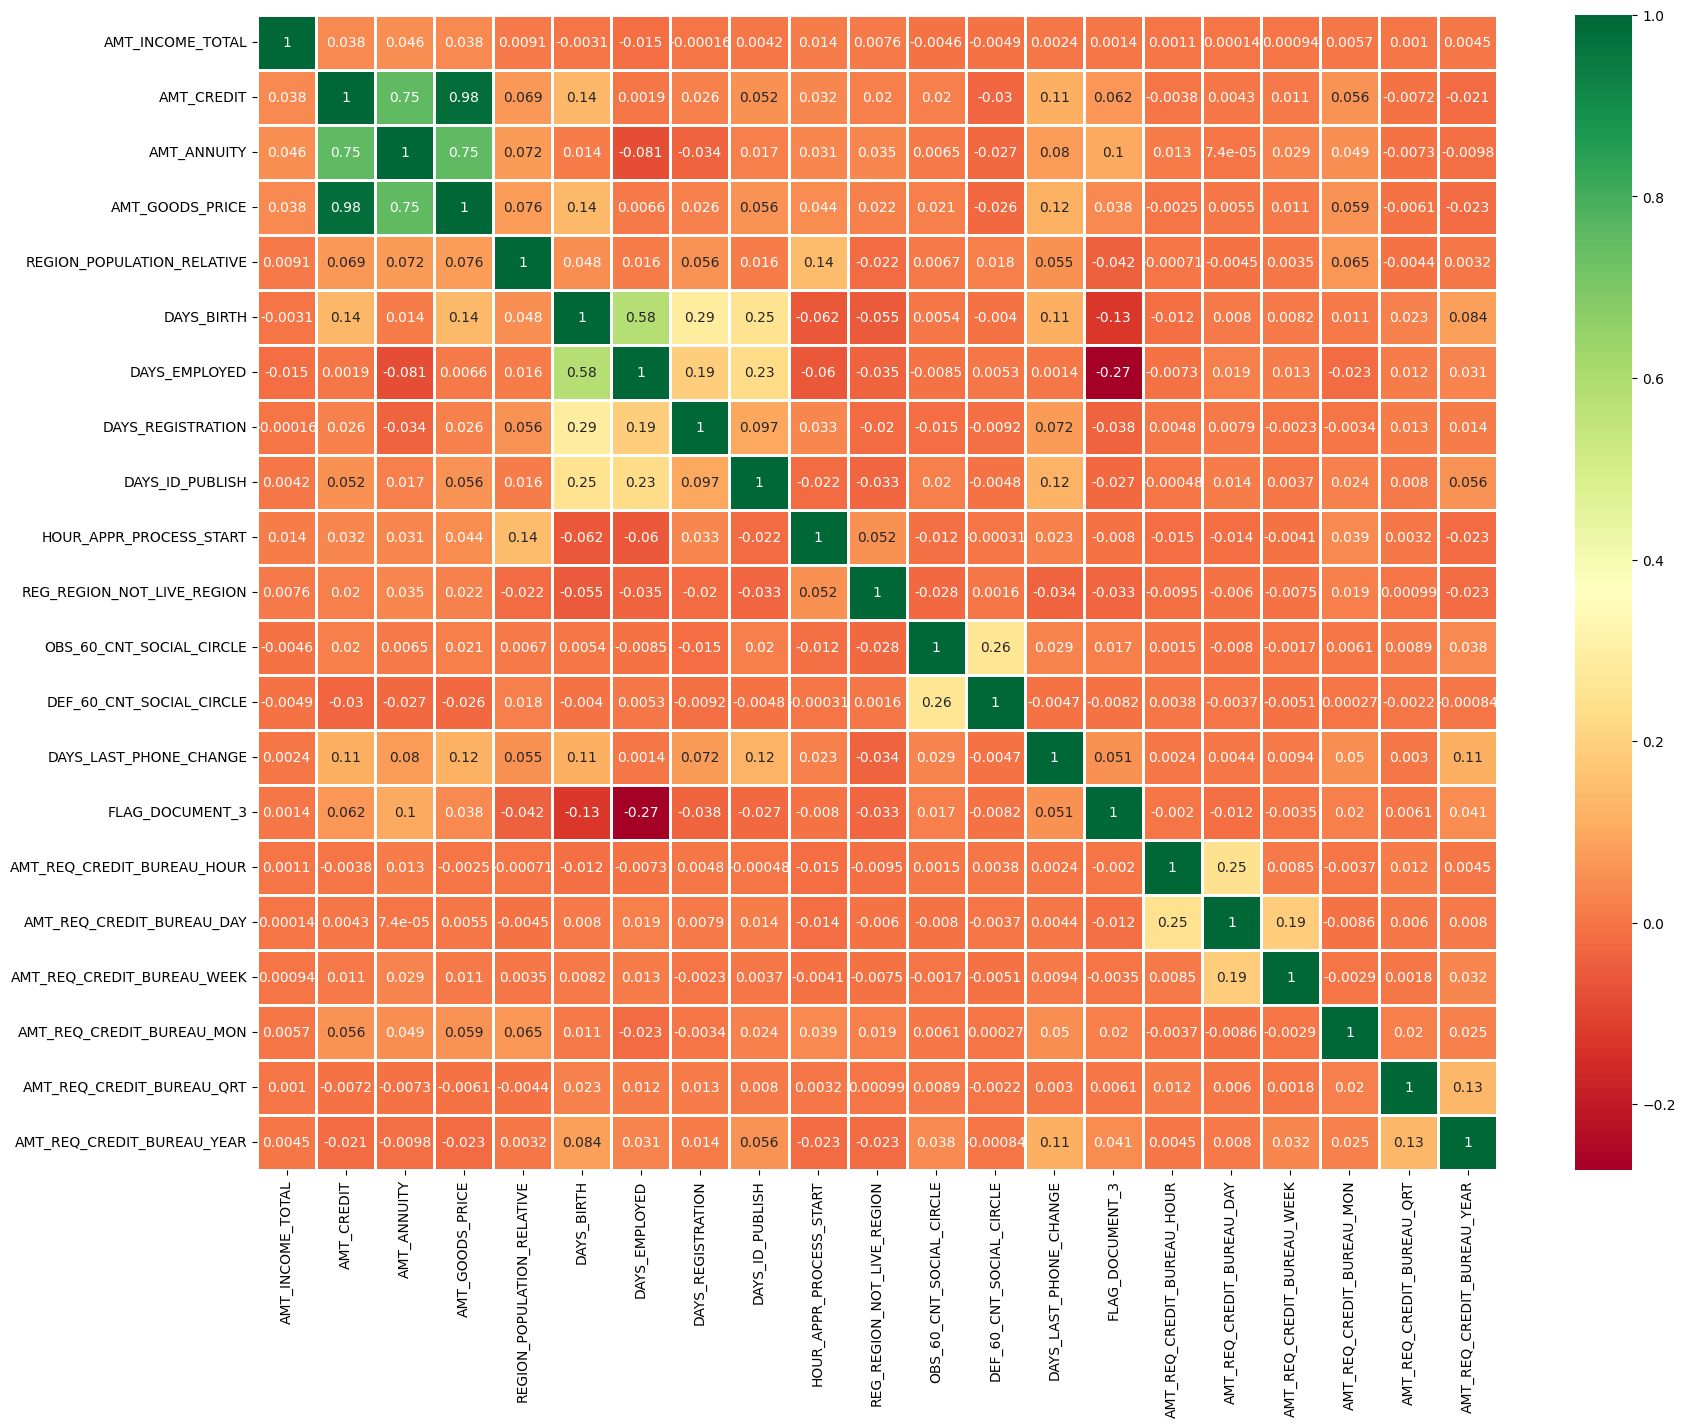

In [166]:
#plotting heatmap to see linear correlation amoung Repayers 

# Select only numeric columns
numeric_columns = Defaulter_df.select_dtypes(include=np.number)

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap="RdYlGn", annot=True, linewidths=1)
plt.show()

<h2 style='text-align: center;'> The End </p>